# Problem Statement

- The goal of this project is to leverage machine learning techniques to analyze driving scenarios and user attributes collected from an **_e-commerce website_**.
- **_By accurately predicting whether users will accept coupons during their journeys_**, the aim is to optimize coupon distribution strategies and enhance user engagement with the platform's offerings.
- The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and **_then asks the user whether he/she will accept the coupon or not_**.


In [1]:
## libraries.

import numpy as np  # numerical operations
import pandas as pd  # data manipulation
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # advanced visualization
import warnings as w  # ignoring the unwanted warnings
from tabulate import tabulate as tb  # tabular output
from scipy.stats import zscore  # for outliers
from sklearn import set_config  # setting diagram configuration

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer  # handling null values
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  # feature enccoding
from imblearn.over_sampling import SMOTE # data imbalanced
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, RandomizedSearchCV  # data splitting.
from sklearn.preprocessing import StandardScaler  # scaling
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest  # feature importance

# model & metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # ensemble models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # tree based model
from sklearn.naive_bayes import BernoulliNB  # probabilistic model
from sklearn.linear_model import LogisticRegression  # baseline model
from sklearn.naive_bayes import GaussianNB  # model
from sklearn.svm import SVC  # model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc  # metrics
from xgboost import XGBClassifier  # model
import pickle  # for models exporting

In [2]:
## settings.

pd.set_option('display.max_columns', None)
set_config(display = 'diagram')
w.filterwarnings('ignore')
%matplotlib inline
sns.set()
sns.set_style(style = 'whitegrid')

# Reading Dataset

In [3]:
## reading csv file.

df = pd.read_csv(r'Ds_Data.csv')
data = df.copy(deep = True)

In [4]:
## top 5 rows.

data.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  \
0         1d  Female  21  Unmarried partner             1   
1         2h  Female  21  Unmarried partner             1   
2         2h  Female  21  Unmarried partner             1   
3         2h  Female  21  Unmarried partner             1   
4         1d  Female  21  Unmarried partner             1   

                  education  occupation           income  car    Bar  \
0  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
2  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
3  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
4  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       NaN                  4~8              1~3   
1       never       NaN                  4~8              1~3   
2       never       NaN                  4~8              1~3   
3       never       NaN                  4~8              1~3   
4       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Accept(Y/N?)  
0              1             1  
1              1             0  
2              1             1  
3              1             0  
4              1             0

In [5]:
## bottom 5 rows.

data.tail()

destination passanger weather  temperature                 coupon  \
12679        Home   Partner   Rainy           55  Carry out & Take away   
12680        Work     Alone   Rainy           55  Carry out & Take away   
12681        Work     Alone   Snowy           30           Coffee House   
12682        Work     Alone   Snowy           30                    Bar   
12683        Work     Alone   Sunny           80      Restaurant(20-50)   

      expiration gender age maritalStatus  has_children         education  \
12679         1d   Male  26        Single             0  Bachelors degree   
12680         1d   Male  26        Single             0  Bachelors degree   
12681         1d   Male  26        Single             0  Bachelors degree   
12682         1d   Male  26        Single             0  Bachelors degree   
12683         2h   Male  26        Single             0  Bachelors degree   

            occupation           income  car    Bar CoffeeHouse CarryAway  \
12679  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12680  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12681  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12682  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12683  Sales & Related  $75000 - $87499  NaN  never       never       1~3   

      RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  \
12679                  4~8              1~3                 1   
12680                  4~8              1~3                 1   
12681                  4~8              1~3                 1   
12682                  4~8              1~3                 1   
12683                  4~8              1~3                 1   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
12679                  0                  0               1              0   
12680                  0                  0               0              1   
12681                  0                  0               1              0   
12682                  1                  1               0              1   
12683                  0                  0               1              0   

       Accept(Y/N?)  
12679             1  
12680             1  
12681             0  
12682             0  
12683             0

In [6]:
## shape.

data.shape

(12684, 25)

In [7]:
## basic information about data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [8]:
## statistical summary of numerical data.

data.describe().round(3)

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count    12684.000     12684.000           12684.0          12684.000   
mean        63.302         0.414               1.0              0.561   
std         19.154         0.493               0.0              0.496   
min         30.000         0.000               1.0              0.000   
25%         55.000         0.000               1.0              0.000   
50%         80.000         0.000               1.0              1.000   
75%         80.000         1.000               1.0              1.000   
max         80.000         1.000               1.0              1.000   

       toCoupon_GEQ25min  direction_same  direction_opp  Accept(Y/N?)  
count          12684.000       12684.000      12684.000     12684.000  
mean               0.119           0.215          0.785         0.568  
std                0.324           0.411          0.411         0.495  
min                0.000           0.000          0.000         0.000  
25%                0.000           0.000          1.000         0.000  
50%                0.000           0.000          1.000         1.000  
75%                0.000           0.000          1.000         1.000  
max                1.000           1.000          1.000         1.000

In [9]:
## summary of categorical data.

data.describe(include = 'O').round(3)

destination passanger weather        coupon expiration  gender  \
count             12684     12684   12684         12684      12684   12684   
unique                3         4       3             5          2       2   
top     No Urgent Place     Alone   Sunny  Coffee House         1d  Female   
freq               6283      7305   10069          3996       7091    6511   

          age    maritalStatus                 education  occupation  \
count   12684            12684                     12684       12684   
unique      8                5                         6          25   
top        21  Married partner  Some college - no degree  Unemployed   
freq     2653             5100                      4351        1870   

                 income                     car    Bar CoffeeHouse CarryAway  \
count             12684                     108  12577       12467     12533   
unique                9                       5      5           5         5   
top     $25000 - $37499  Scooter and motorcycle  never       less1       1~3   
freq               2013                      22   5197        3385      4672   

       RestaurantLessThan20 Restaurant20To50  
count                 12554            12495  
unique                    5                5  
top                     1~3            less1  
freq                   5376             6077

In [10]:
## columns.

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [11]:
## get distribution of target variable.

print(data['Accept(Y/N?)'].value_counts(normalize = True))
print(data['Accept(Y/N?)'].unique())

Accept(Y/N?)
1    0.568433
0    0.431567
Name: proportion, dtype: float64
[1 0]


## Observations

- Data has **_(12684 rows, 25 columns)_**.
- Target Variable shows **_57.8%(7210) - 43.2%(5474)_** Distribution, which can indicating slightly data imblanced.
- There are **_8_** numerical features & **_17_** categorical features.
- Also some of the columns like **_(car, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50)_** are containing missing values, further need to be impute or drop.
- As per the observation most of the features consisting inconsistancy which further need to be correct in **_preprocessing_**.
- According to **_Statistical_** summary there are not **_extreme outliers_** in the dataset, as most of the features having binary values strictly between **_(0, 1)_** .
- The Temperature variable ranges between **_(30 to 80)_**, with mean of **_63.302%_**, median of **__80%** & standard deviation of **_19.154%_** suggesting potential outliers.
- **_Based on this observation we do further process_**.

# Data Preprocessing/Cleaning

In [12]:
## column names.

mapped = {
    'maritalStatus': 'Marital_Status',
    'has_children': 'Has_Children',
    'CoffeeHouse': 'Coffee_House',
    'CarryAway': 'Carry_Away',
    'RestaurantLessThan20': 'Restaurant_Less_Than_20',
    'Restaurant20To50': 'Restaurant_20_To_50',
    'toCoupon_GEQ5min': 'To_Coupon_GEQ_5_min',
    'toCoupon_GEQ15min': 'To_Coupon_GEQ_15_min',
    'toCoupon_GEQ25min': 'To_Coupon_GEQ_25_min',
    'Accept(Y/N?)': 'Accept_Y_N'
}

data = data.rename(columns = mapped)
data.columns = data.columns.str.title()

### Duplicates

In [13]:
## handling duplicates.

print(f'Before Dropping Duplicates: {data.duplicated().sum()}, Shape: {data.shape}')
data.drop_duplicates(ignore_index = True, inplace = True)
print(f'After Dropping Duplicates: {data.duplicated().sum()}, Shape: {data.shape}')

Before Dropping Duplicates: 291, Shape: (12684, 25)
After Dropping Duplicates: 0, Shape: (12393, 25)


### Missing Values

In [14]:
## checking missing values.

missing_values = data.isna().sum().to_frame(name = 'Missing_Values')\
.sort_values(by = 'Missing_Values', ascending = False)
missing_values["Missing_Values_%"] = (missing_values["Missing_Values"] / len(data)) * 100
missing_values = missing_values[missing_values["Missing_Values"] > 0]

print(tb(missing_values, headers = ['Features', 'Missing_Values', 'Missing_Values_%'], tablefmt = 'grid'))

+-------------------------+------------------+--------------------+
| Features                |   Missing_Values |   Missing_Values_% |
+=========================+==================+====================+
| Car                     |            12287 |          99.1447   |
+-------------------------+------------------+--------------------+
| Coffee_House            |              215 |           1.73485  |
+-------------------------+------------------+--------------------+
| Restaurant_20_To_50     |              188 |           1.51699  |
+-------------------------+------------------+--------------------+
| Carry_Away              |              148 |           1.19422  |
+-------------------------+------------------+--------------------+
| Restaurant_Less_Than_20 |              128 |           1.03284  |
+-------------------------+------------------+--------------------+
| Bar                     |              106 |           0.855322 |
+-------------------------+------------------+--

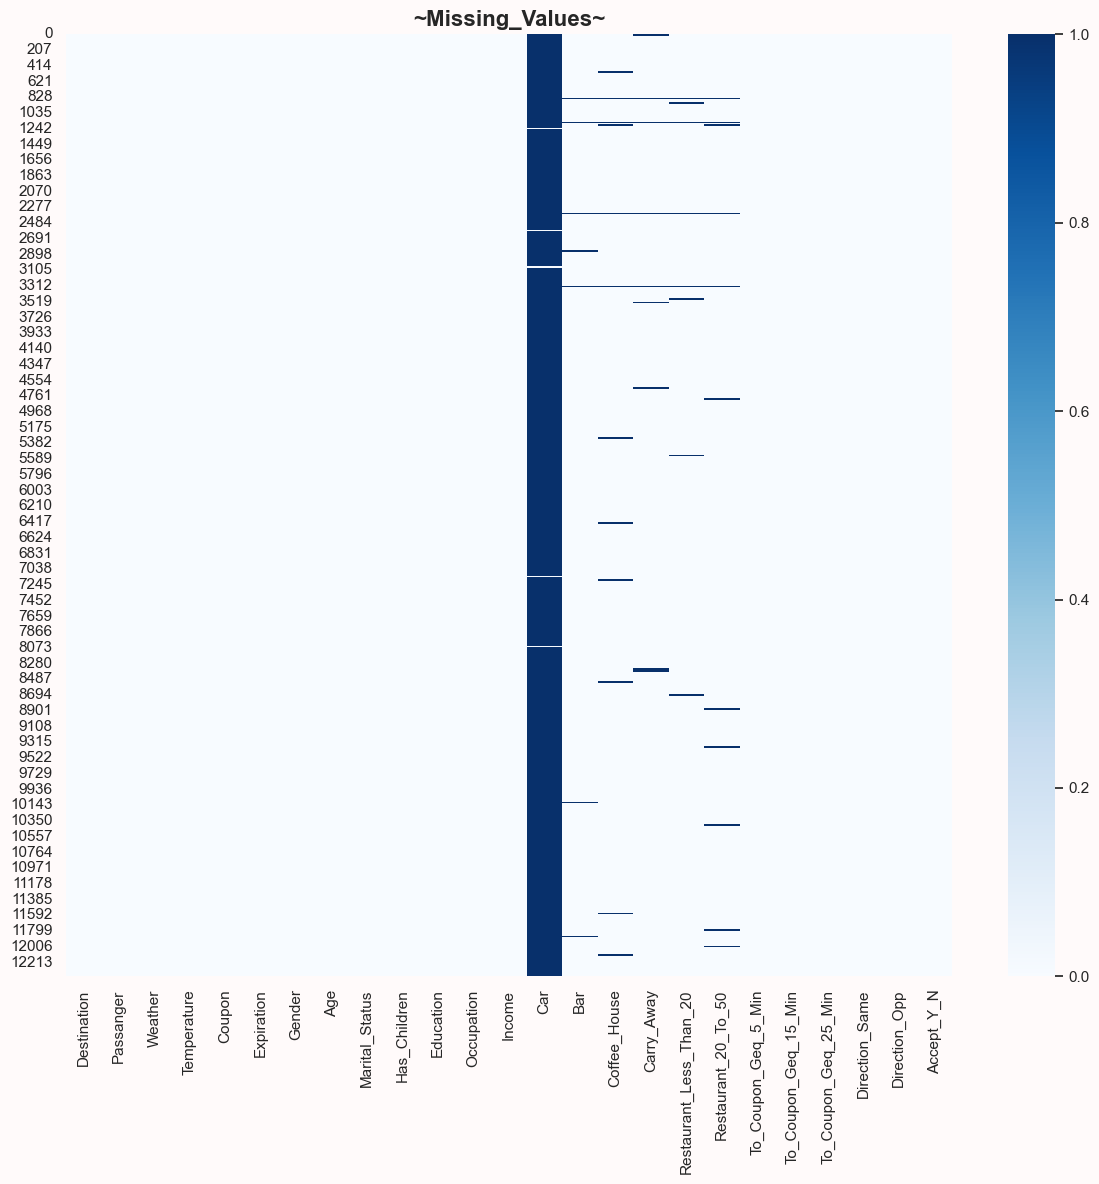

In [15]:
## plot missing values.

plt.figure(figsize = (12, 12),
           facecolor = 'snow')

sns.heatmap(data.isna(),\
            cmap = 'Blues')

plt.title('~Missing_Values~',\
          fontweight = 'bold',\
          fontsize = 16)
plt.tight_layout()
plt.show()

In [16]:
## impute/drop the missing values

data = data.drop('Car', axis = 1)

imputer = SimpleImputer(strategy = 'most_frequent')
data[:] = imputer.fit_transform(data)

if data.isna().sum().sum() > 0:
    print('There are still missing values!')
else:
    print('No missing values left. Imputation successful!')

No missing values left. Imputation successful!


### Columns Manipulation

In [17]:
## destination

data['Destination'] = data['Destination'].replace('No Urgent Place', 'No_Urgent_Place')

In [18]:
## passanger.

data['Passanger'] = data['Passanger'].replace({'Friend(s)': 'Friends', 'Kid(s)': 'Kids'})

In [19]:
## marital status.

data['Marital_Status'] = data['Marital_Status'].replace({'Unmarried partner': 'Unmarried', 'Married partner': 'Married'})

In [20]:
## education.

data['Education'] = data['Education'].replace({'Some college - no degree': 'No_Degree', 'Bachelors degree': 'Bachelors_Degree',\
                           'Associates degree': 'Associates_Degree', 'High School Graduate': 'High_School_Graduate',\
                           'Graduate degree (Masters or Doctorate)': 'Graduate_Degree(Ms_or_Doc)', 'Some High School': 'High_School'})

In [21]:
## temperature.

bins = [0, 40, 70, 100]
labels = ['Cold', 'Moderate', 'Hot']

data['Temperature_Bin'] = pd.cut(data['Temperature'], bins = bins, labels = labels)
data['Temperature_Bin'].unique()

['Moderate', 'Hot', 'Cold']
Categories (3, object): ['Cold' < 'Moderate' < 'Hot']

In [22]:
## expiration.

data['Expiration_Hours'] = data['Expiration'].map({'1d': 24, '2h': 2})
data['Expiration_Hours'].unique()

array([24,  2], dtype=int64)

In [23]:
## age.

mapp = {
    'below21': '<21',
    '21': '21-30',
    '26': '21-30',
    '31': '31-40',
    '36': '31-40',
    '41': '41-50',
    '46': '41-50',
    '50plus': '50+'
}

data['Age_Group'] = data['Age'].map(mapp)
data['Age_Group'].unique()

array(['21-30', '41-50', '31-40', '50+', '<21'], dtype=object)

In [24]:
## income.

def midpoint(income):
    if 'Less than' in income:
        return 12500
    if 'or More' in income:
        return 100000
    nums = list(map(int, income.replace('$', '').replace(',', '').split('-')))
    return np.mean(nums)

data['Income_Numeric'] = data['Income'].apply(midpoint)
data['Income_Bin'] = pd.qcut(data['Income_Numeric'], q = 4, labels = ['Low_Income', 'Mid_Income', 'High_Income', 'Very_High_Income'])
data['Income_Bin'].unique()

['Mid_Income', 'High_Income', 'Low_Income', 'Very_High_Income']
Categories (4, object): ['Low_Income' < 'Mid_Income' < 'High_Income' < 'Very_High_Income']

In [25]:
## Replacing.

mapp = {
    'never': 'Never',
    'less1': '0-1',
    '1~3': '1-3',
    '4~8': '4-8 ',
    'gt8': '8+'
}

cols = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50']

for i in cols:
    data[i] = data[i].map(mapp)

### Outliers

In [26]:
## checking outliers using zscore method.

data_zscore = data[data.select_dtypes(include = np.number).columns].apply(zscore)

zscore_outliers = data[(data_zscore.abs() > 3).any(axis = 1)]\
                        .reset_index()\
                        .drop('index', axis = 1)
if zscore_outliers.shape[0] > 0:
    print(f'Number of outliers: {zscore_outliers[0]}')
else:
    print('No outliers detected based on Z-score threshold of 3.')

No outliers detected based on Z-score threshold of 3.


In [27]:
## checking outliers using iqr method.

num_col = data.select_dtypes(include = np.number).columns

continuous_col = [i for i in num_col if data[i].nunique() > 2] 

q1 = data[continuous_col].quantile(0.25)
q3 = data[continuous_col].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

((data[continuous_col] > upper_bound) | (data[continuous_col] < lower_bound)).sum()

Temperature       0
Income_Numeric    0
dtype: int64

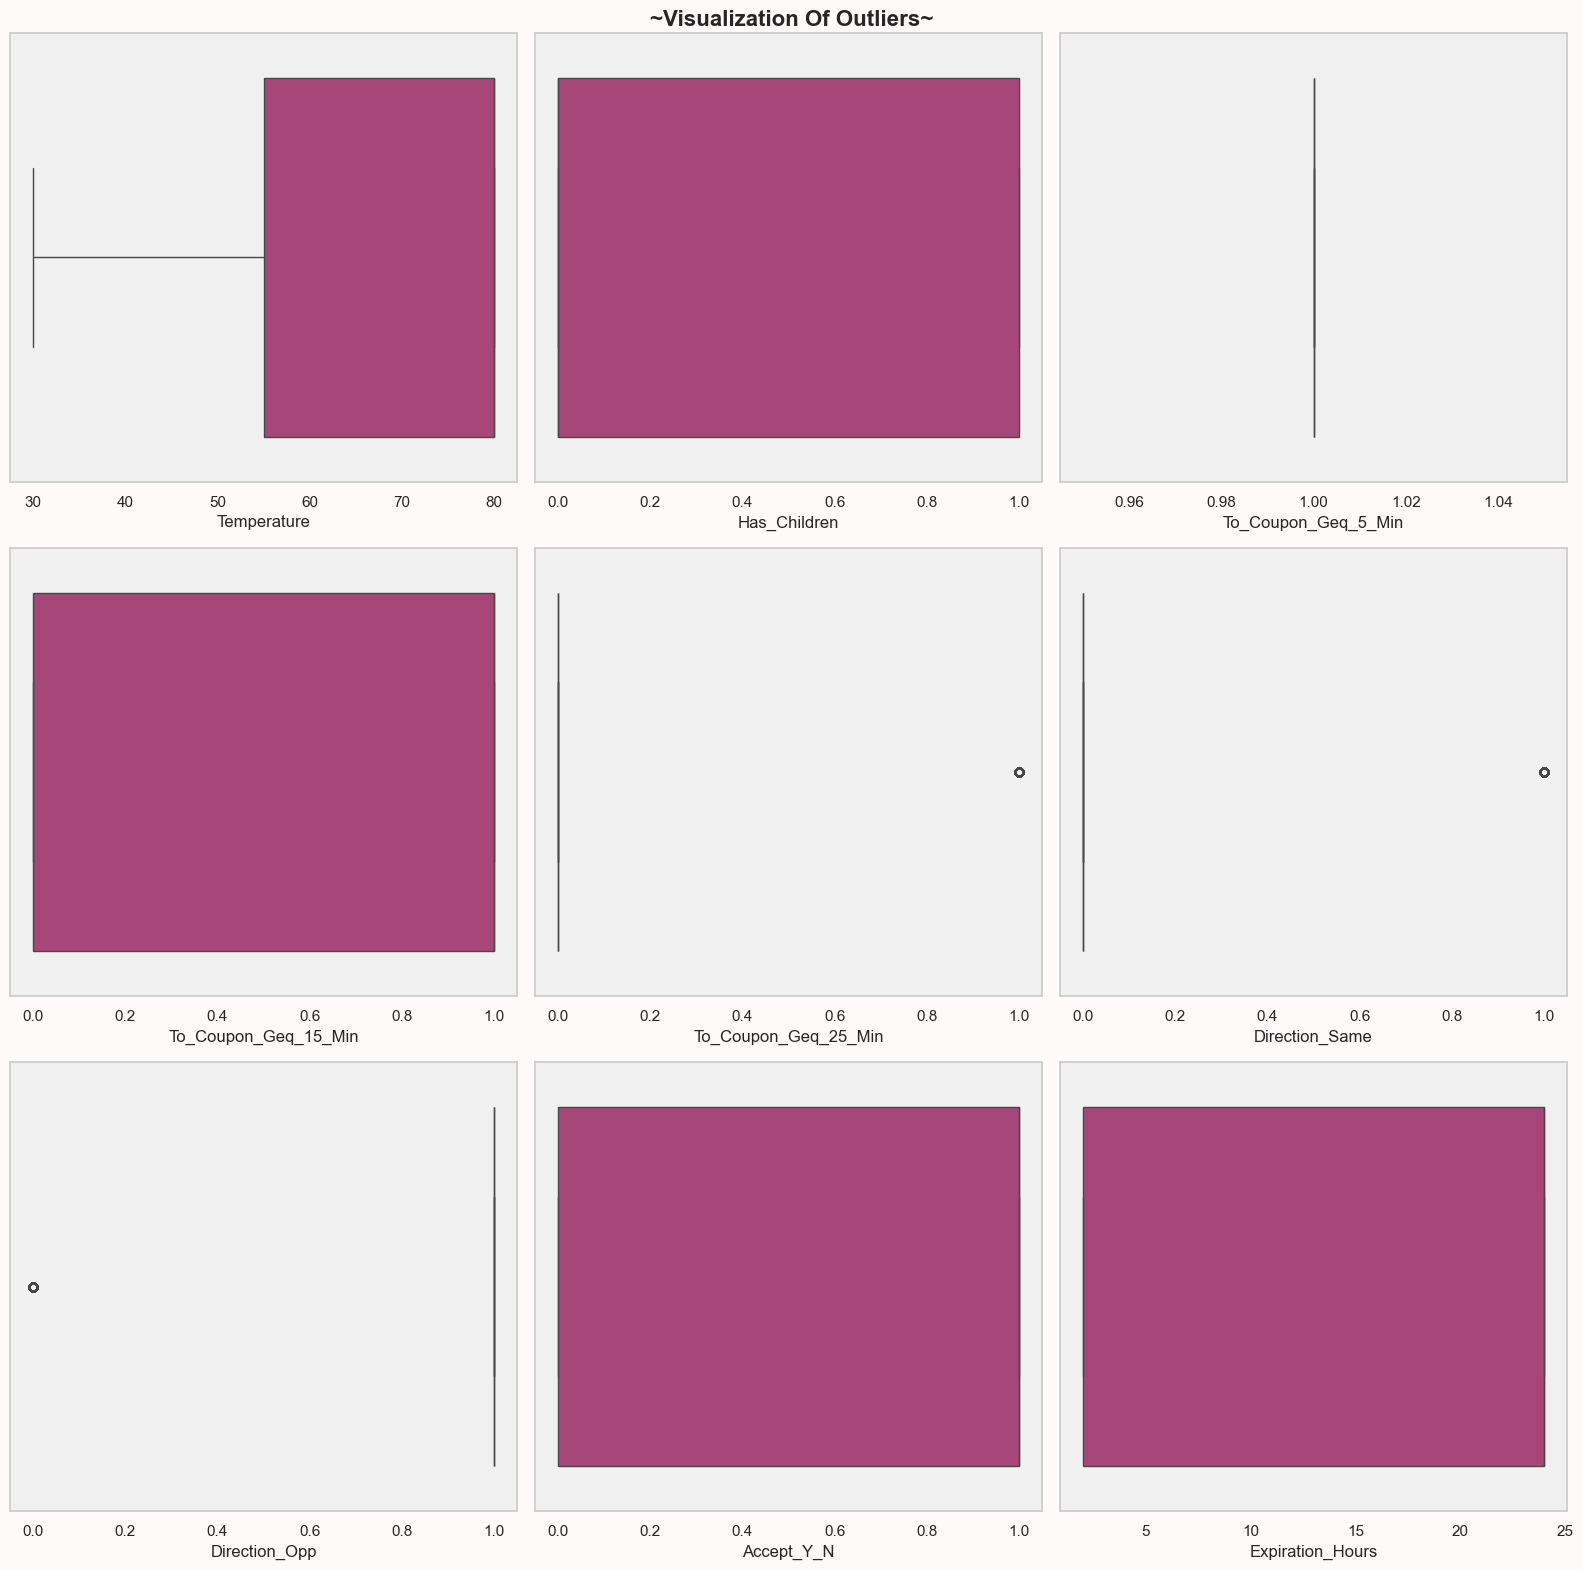

In [28]:
## plotting outliers.

fig, axes = plt.subplots(3, 3, figsize = (16, 16),\
                     facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, num_col):
    ax = sns.boxplot(data = data,\
                x = i,\
                ax = ax,\
                palette = 'magma',\
                showfliers = True
               )
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')
    
#for j in range(len(num_col), len(axes)):
    #axes[j].axis('off')

plt.suptitle(f'~Visualization Of Outliers~',\
          fontweight = 'bold',\
          fontsize = 16)
plt.tight_layout()
plt.show()

## Observations

- Upto now, we remove the **_duplicates values_** from the dataset.
- We impute the null values using **_SimpleImputer_** technique, as we see only categorical columns has null values so we used **_most_frequent_**(mode) argument.
- Dropping the **_Car_** column it has contains more than **_99%_** missing values.
- Checking the **_outliers & plot_** them using **_(zscore, iqr, boxplot)_**, as we see no outlier detect.
- Replaced some **_columns names_** for easy access.
- Replaced some values of the columns for **_analysis purpose_** like **_(Destination, Passangers, Education, Martial_Status, Bar, Coffee_House, Carry_Away, Restaurant_Less_Than_20, Restaurant_20_To_50)_**.
- Also, mapping some values of the **_(Expiration)_** column.
- Columns like **_(Income, Age)_** making buckets.
- Now based, on this features we perform **_Exploratory Data Analysis_**.

# Exploratory Data Analysis

In [29]:
## drop old columns & separeting.

data.drop(['Income', 'Expiration', 'Age', 'Temperature', 'Income_Numeric'], axis = 1, inplace = True)

numerical_cols = data.select_dtypes(include = np.number).drop('Accept_Y_N', axis = 1)
categorical_cols = data.select_dtypes(include = ['O', 'category'])
target_col = data[['Accept_Y_N']]

print('Numerical Columns: ', numerical_cols.columns)
print('Categorical Columns: ', categorical_cols.columns)
print('Target Variable: ', target_col.columns)

Numerical Columns:  Index(['Has_Children', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp',
       'Expiration_Hours'],
      dtype='object')
Categorical Columns:  Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Education', 'Occupation', 'Bar', 'Coffee_House',
       'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
       'Temperature_Bin', 'Age_Group', 'Income_Bin'],
      dtype='object')
Target Variable:  Index(['Accept_Y_N'], dtype='object')


## Univariate Analysis

### Numerical Columns

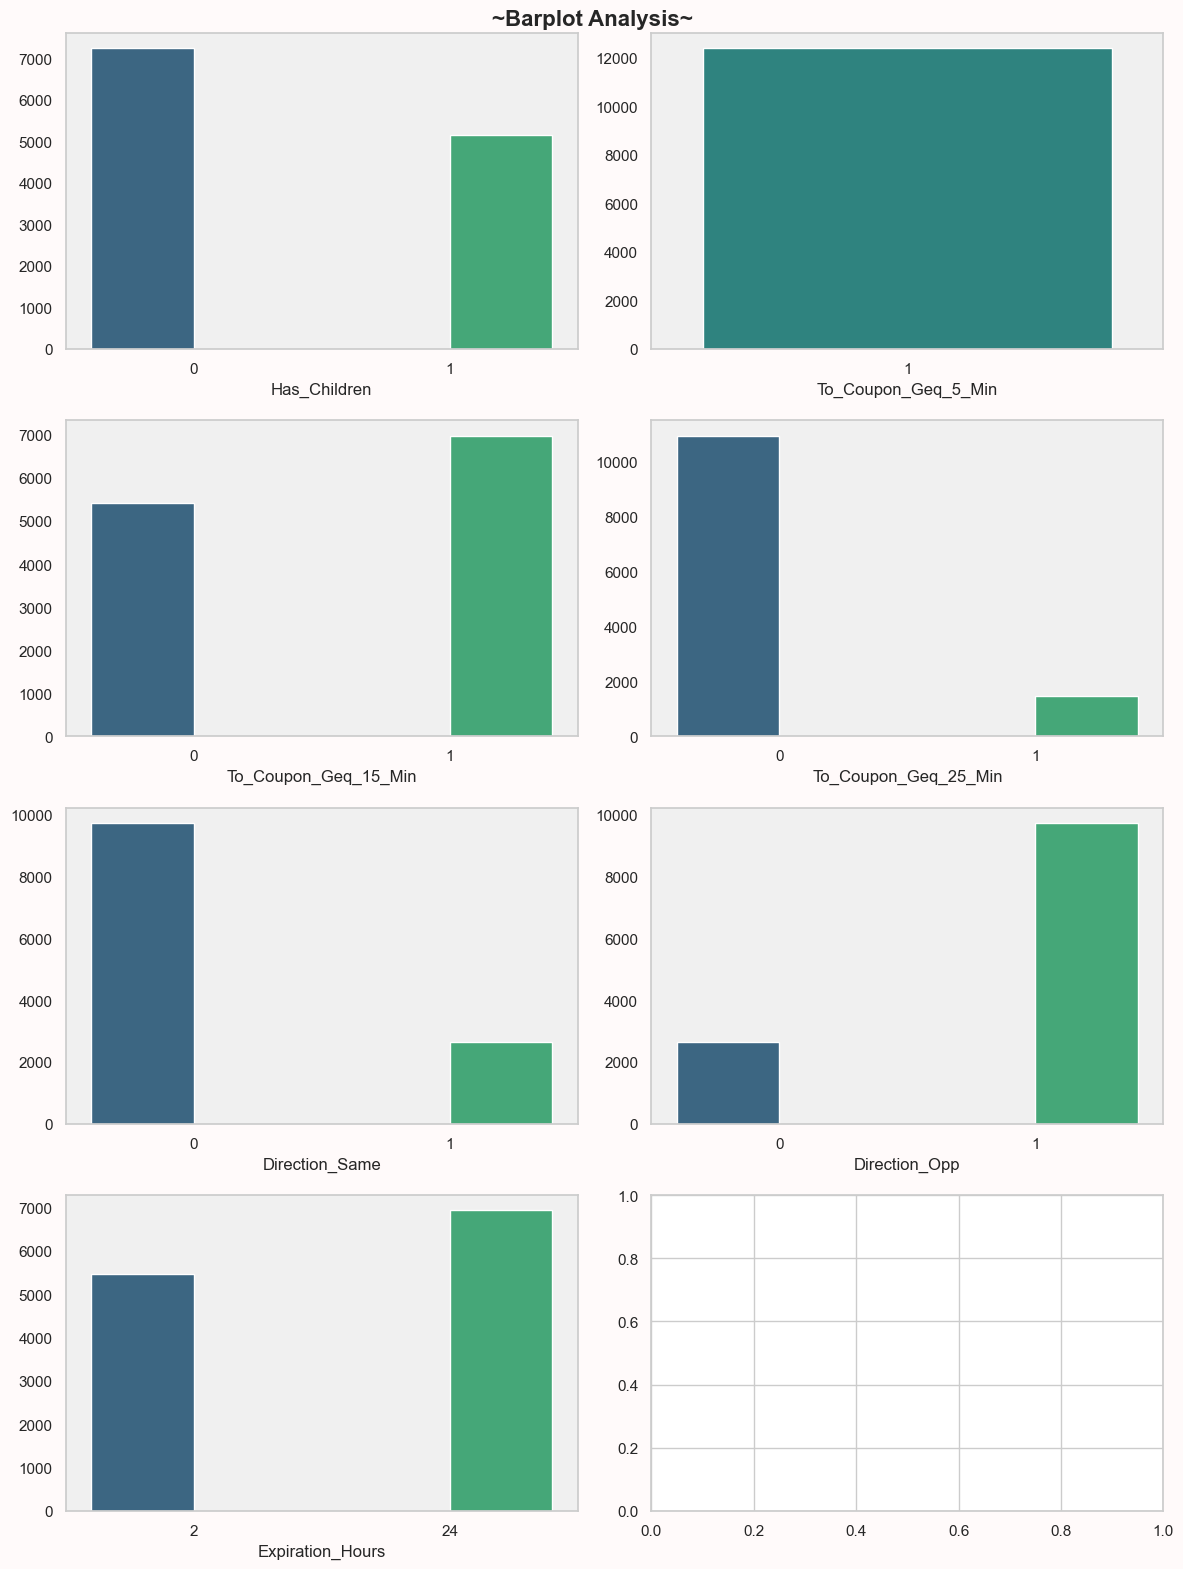

In [30]:
## bar plot.

fig, axes = plt.subplots(4, 2, figsize = (12, 16), facecolor = 'snow')
axes = axes.flatten()

for ax, i in zip(axes, numerical_cols):
    sns.barplot(x = data[i].value_counts().index,\
                y = data[i].value_counts().values,\
                palette = 'viridis',\
                dodge = True,\
                ax = ax
                )
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('~Barplot Analysis~',\
             fontweight = 'bold',\
             fontsize = 16)
plt.tight_layout()
plt.show()

### Categorical Columns

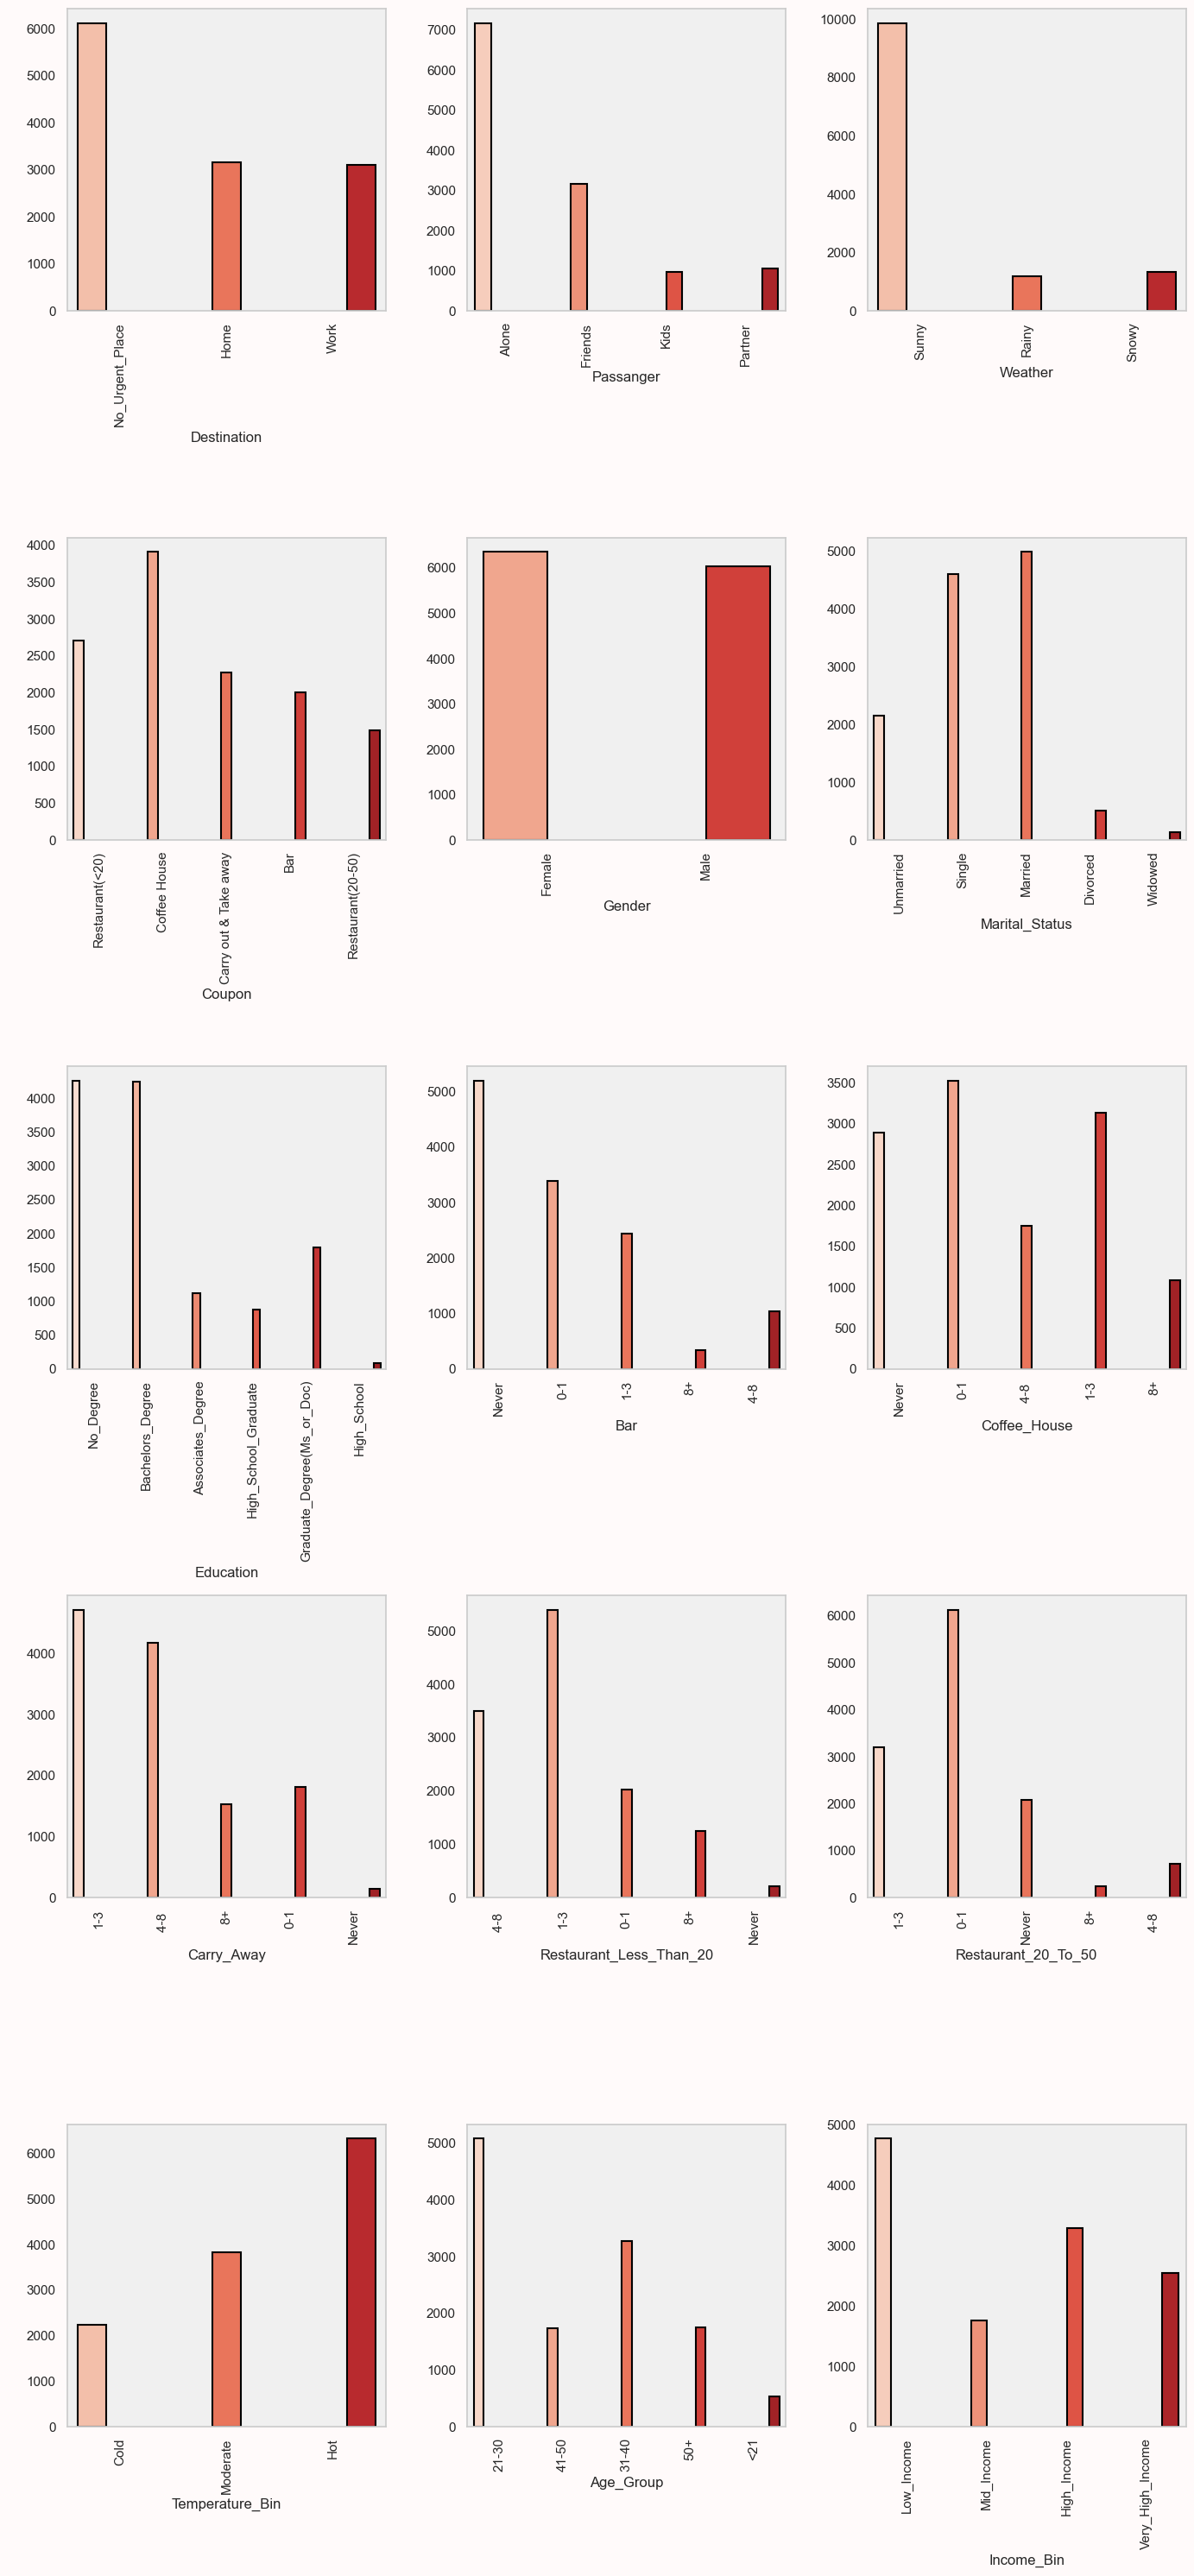

In [31]:
## count plot.

temp = categorical_cols.drop('Occupation', axis = 1)

fig, axes = plt.subplots(5, 3, figsize = (14, 30), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, temp):
    sns.countplot(data = data,\
                  x = i,\
                  palette = 'Reds',\
                  dodge = True,\
                  edgecolor = 'black',\
                  linewidth = 1.5,\
                  saturation = 0.8,\
                  ax = ax
)
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')
    ax.set_ylabel(' ')
    for i in ax.get_xticklabels():
        i.set_rotation(90)

plt.tight_layout()
plt.show()

### Target Variable

       Accept_Y_N
count   12393.000
mean        0.566
std         0.496
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000


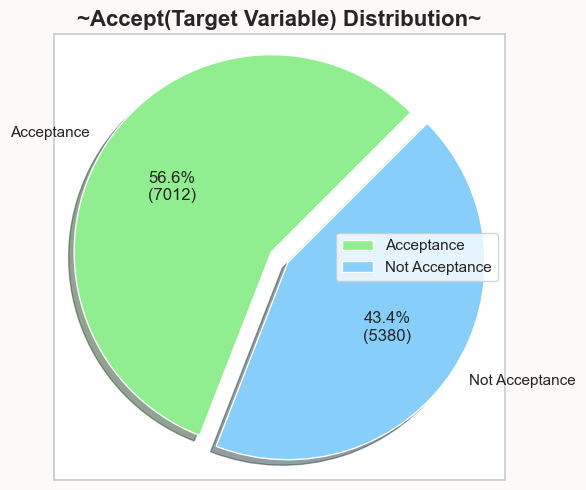

In [32]:
## stats & distribution of target variable.

print(target_col.describe().round(3))

counts = target_col.value_counts()
total = counts.sum()

plt.figure(figsize = (6, 6),\
           facecolor = 'snow')

plt.pie(x = counts,\
        colors = ['lightgreen', 'lightskyblue'],\
        labels = ['Acceptance', 'Not Acceptance'],\
        explode = (0, 0.1),\
        shadow = True,\
        autopct = lambda x: f'{x:.1f}%\n({int(x * total / 100)})',\
        startangle = 45,\
        frame = True
       )

plt.title('~Accept(Target Variable) Distribution~',\
          fontweight = 'bold',\
          fontsize = 16)
plt.legend()
plt.grid(visible = False)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

#### Key Insights from Univariate Analysis
- Coupon redemption is primarily influenced by proximity, travel direction, and expiration time. Most customers are unwilling to travel beyond 15 minutes, and very few go beyond 25 minutes, indicating that closer locations drive higher engagement. Additionally, many customers are not traveling in the same direction as the coupon location, making route deviations a potential barrier. Urgency matters, with a significant portion of coupons expiring within 2 hours, encouraging immediate redemptions.

- Customer preferences indicate that leisure-related and solo-friendly coupons, such as coffee shops and low-cost restaurants, perform well. Weather impacts engagement, with sunny days boosting and bad weather reducing coupon usage. Affordable dining options attract more customers, while bar coupons have limited reach.

- Demographic factors also play a role. Younger (21-40) and low-income groups dominate the customer base, reinforcing the need for budget-friendly and frequently redeemable offers. Students, unemployed individuals, and professionals in computer and sales fields are the top occupational groups, suggesting that flexible schedules may impact coupon usage.

#### Conclusion:
- To maximize effectiveness, businesses should focus on short-distance, time-sensitive, and affordable coupons, targeting customers traveling for leisure or non-urgent reasons. Coupons for coffee shops, casual dining, and carry-out options should be prioritized, especially in good weather conditions. Marketers should also leverage immediate-use offers with short expiration times, ensuring that coupons align with customer routines and travel patterns for better redemption rates.

## Bivariate Analysis

### 1. Customer Demographics & Acceptance Behavior

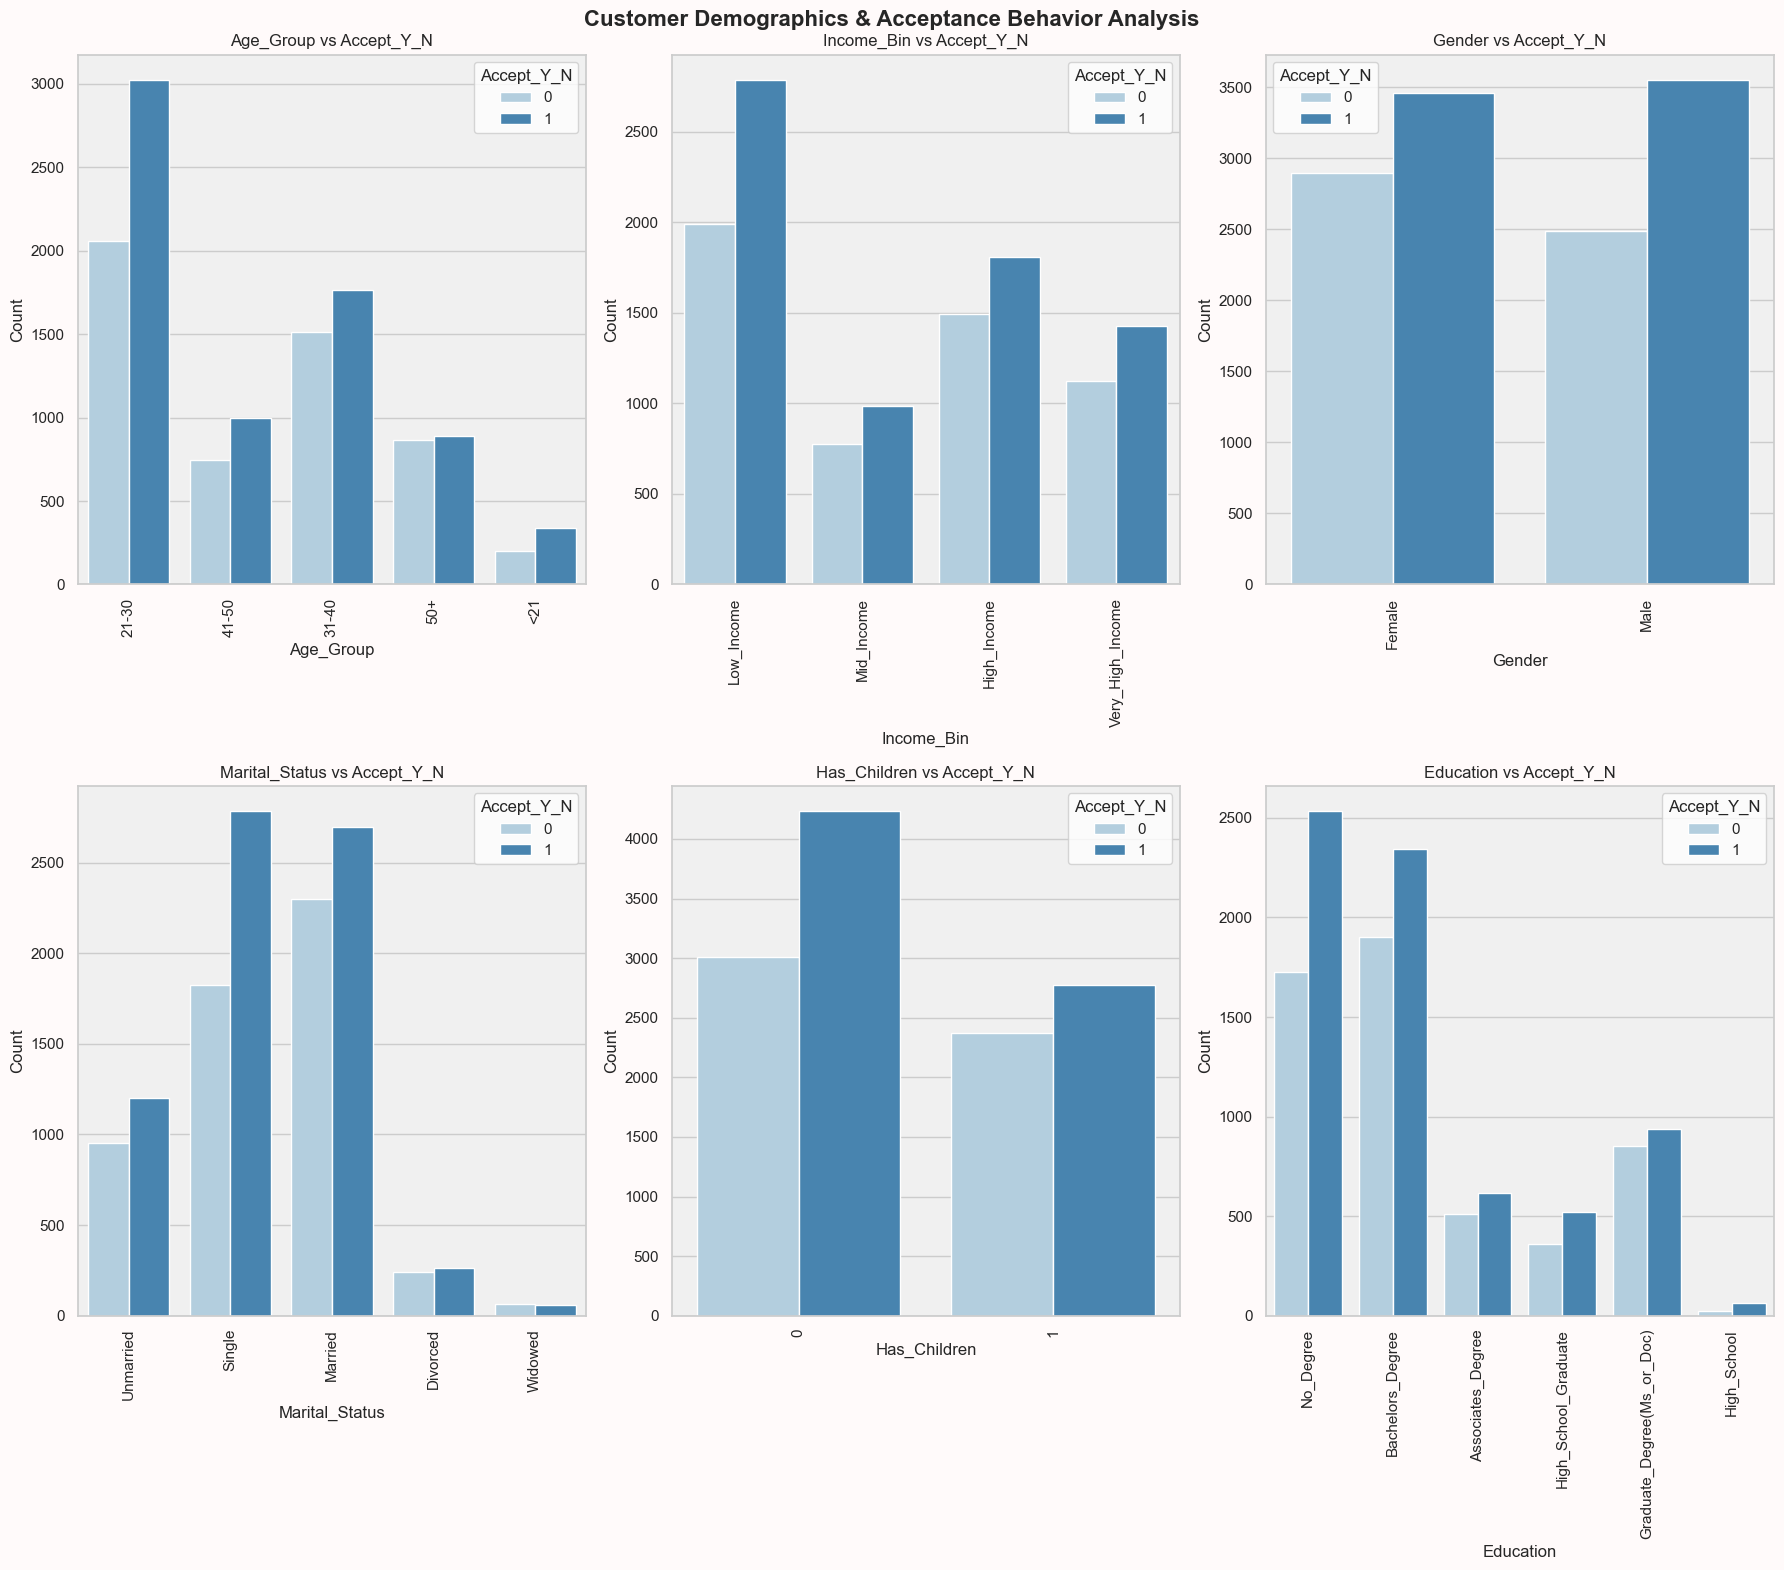

In [33]:
## plot.

fig, axs = plt.subplots(2, 3, figsize=(18, 16), facecolor = 'snow')

df1 = ['Age_Group', 'Income_Bin', 'Gender', 'Marital_Status', 'Has_Children', 'Education']

for i, feature in enumerate(df1):
    ax = axs[i//3, i%3]
    sns.countplot(data = data, x = feature, hue = 'Accept_Y_N', ax = ax, palette = "Blues")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('Customer Demographics & Acceptance Behavior Analysis', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

### 2. Travel Behavior & Coupon Accessibility

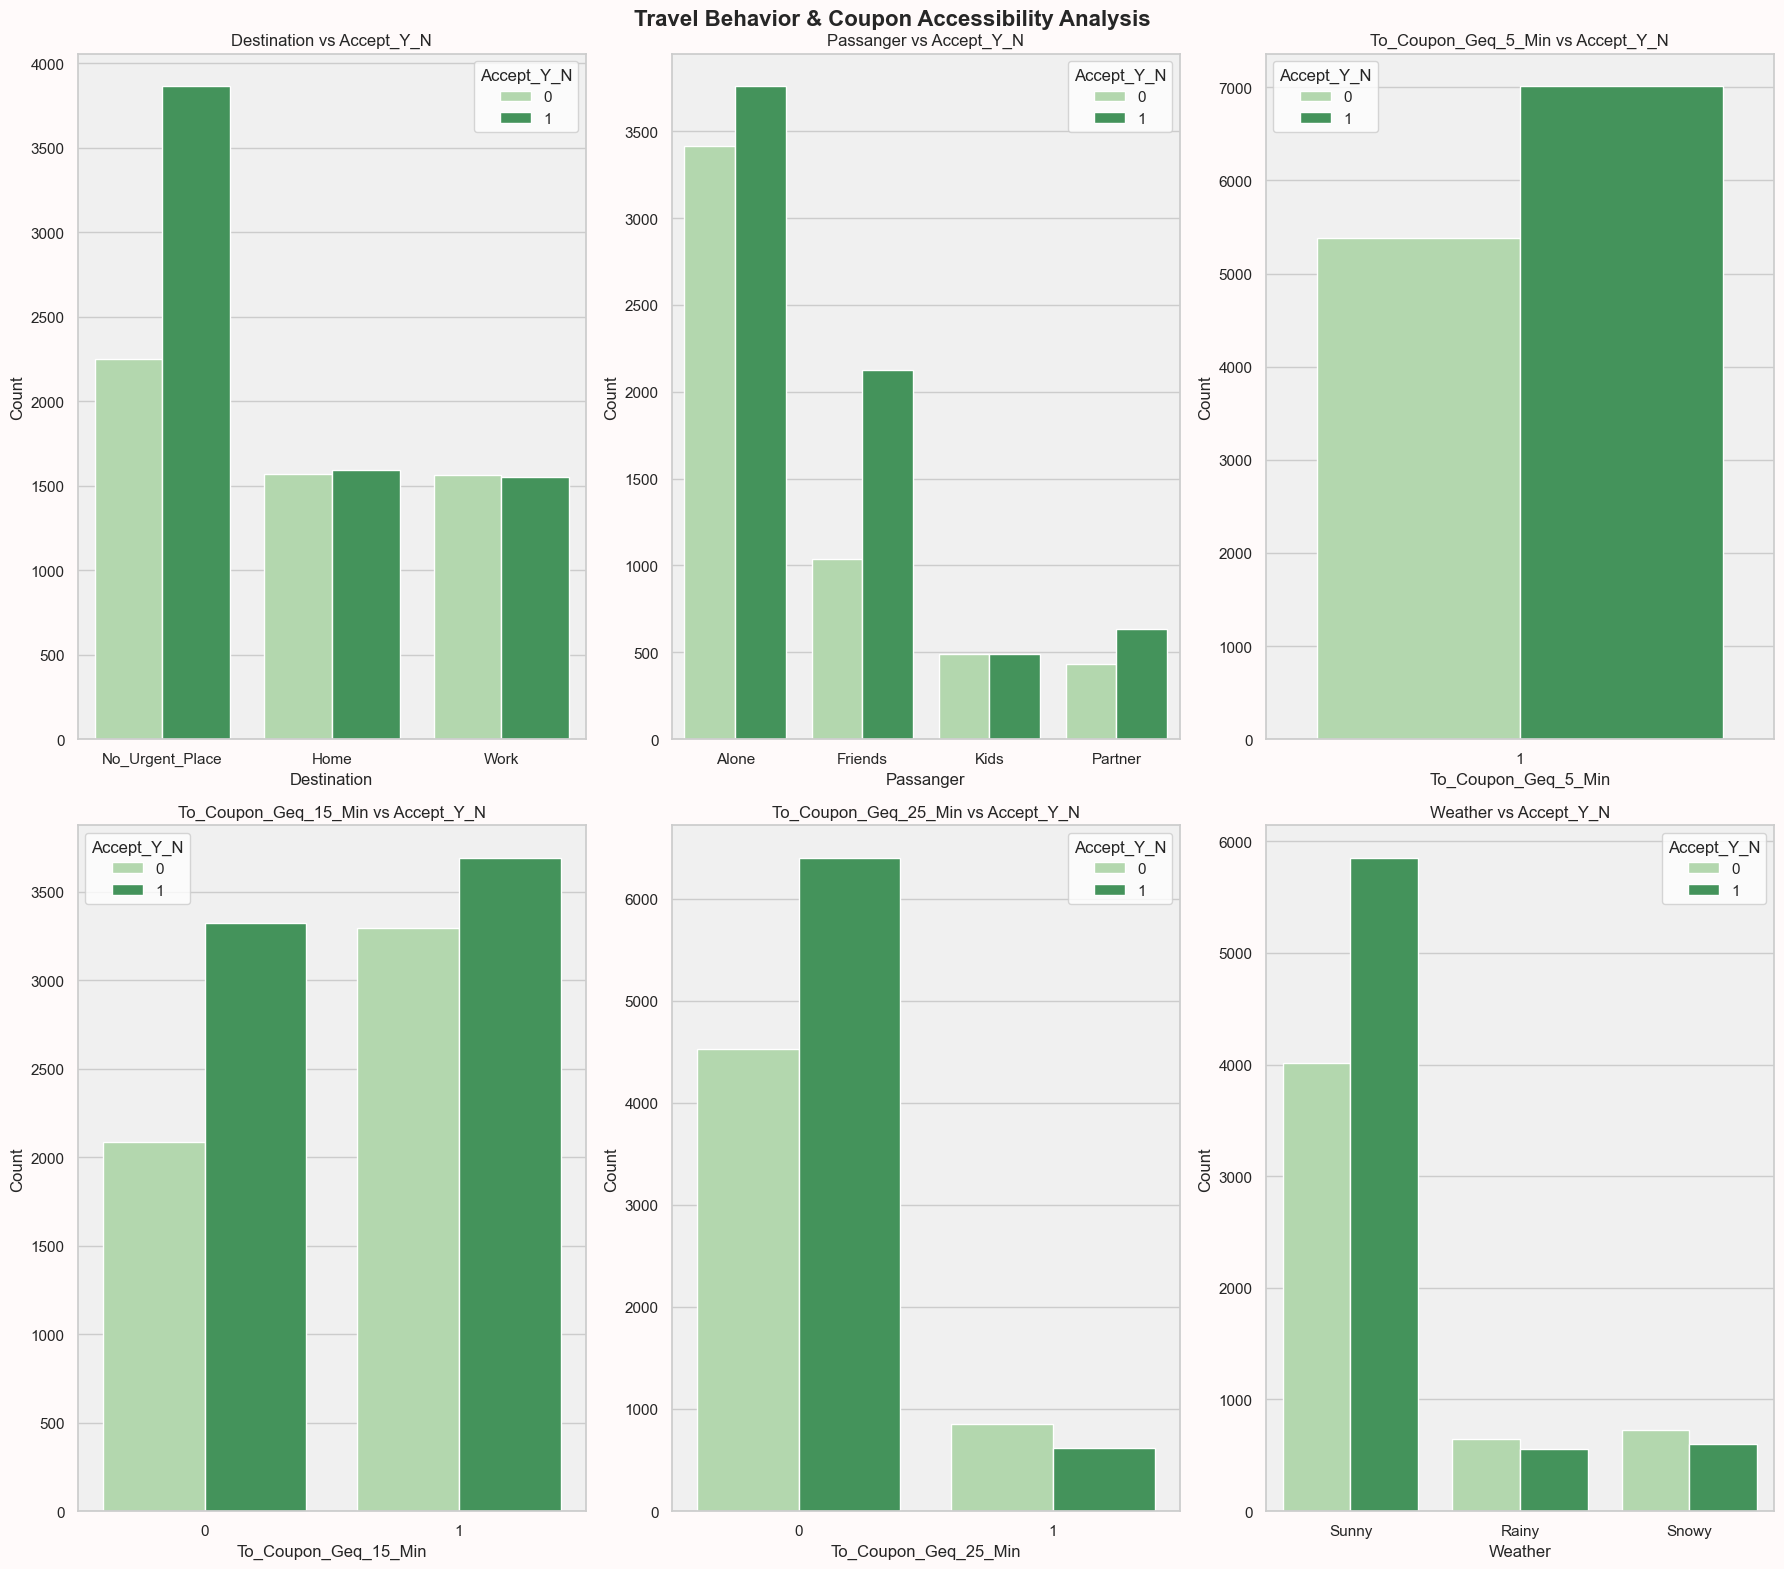

In [34]:
## plot.

fig, axs = plt.subplots(2, 3, figsize = (18, 16), facecolor = 'snow')
df2 = ['Destination', 'Passanger', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min', 'Weather']

for i, feature in enumerate(df2):
    ax = axs[i // 3, i % 3]  
    sns.countplot(data = data, x = feature, hue = 'Accept_Y_N', ax = ax, palette = "Greens")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('Travel Behavior & Coupon Accessibility Analysis', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

### 3. Coupon Type & Past Purchase Behavior

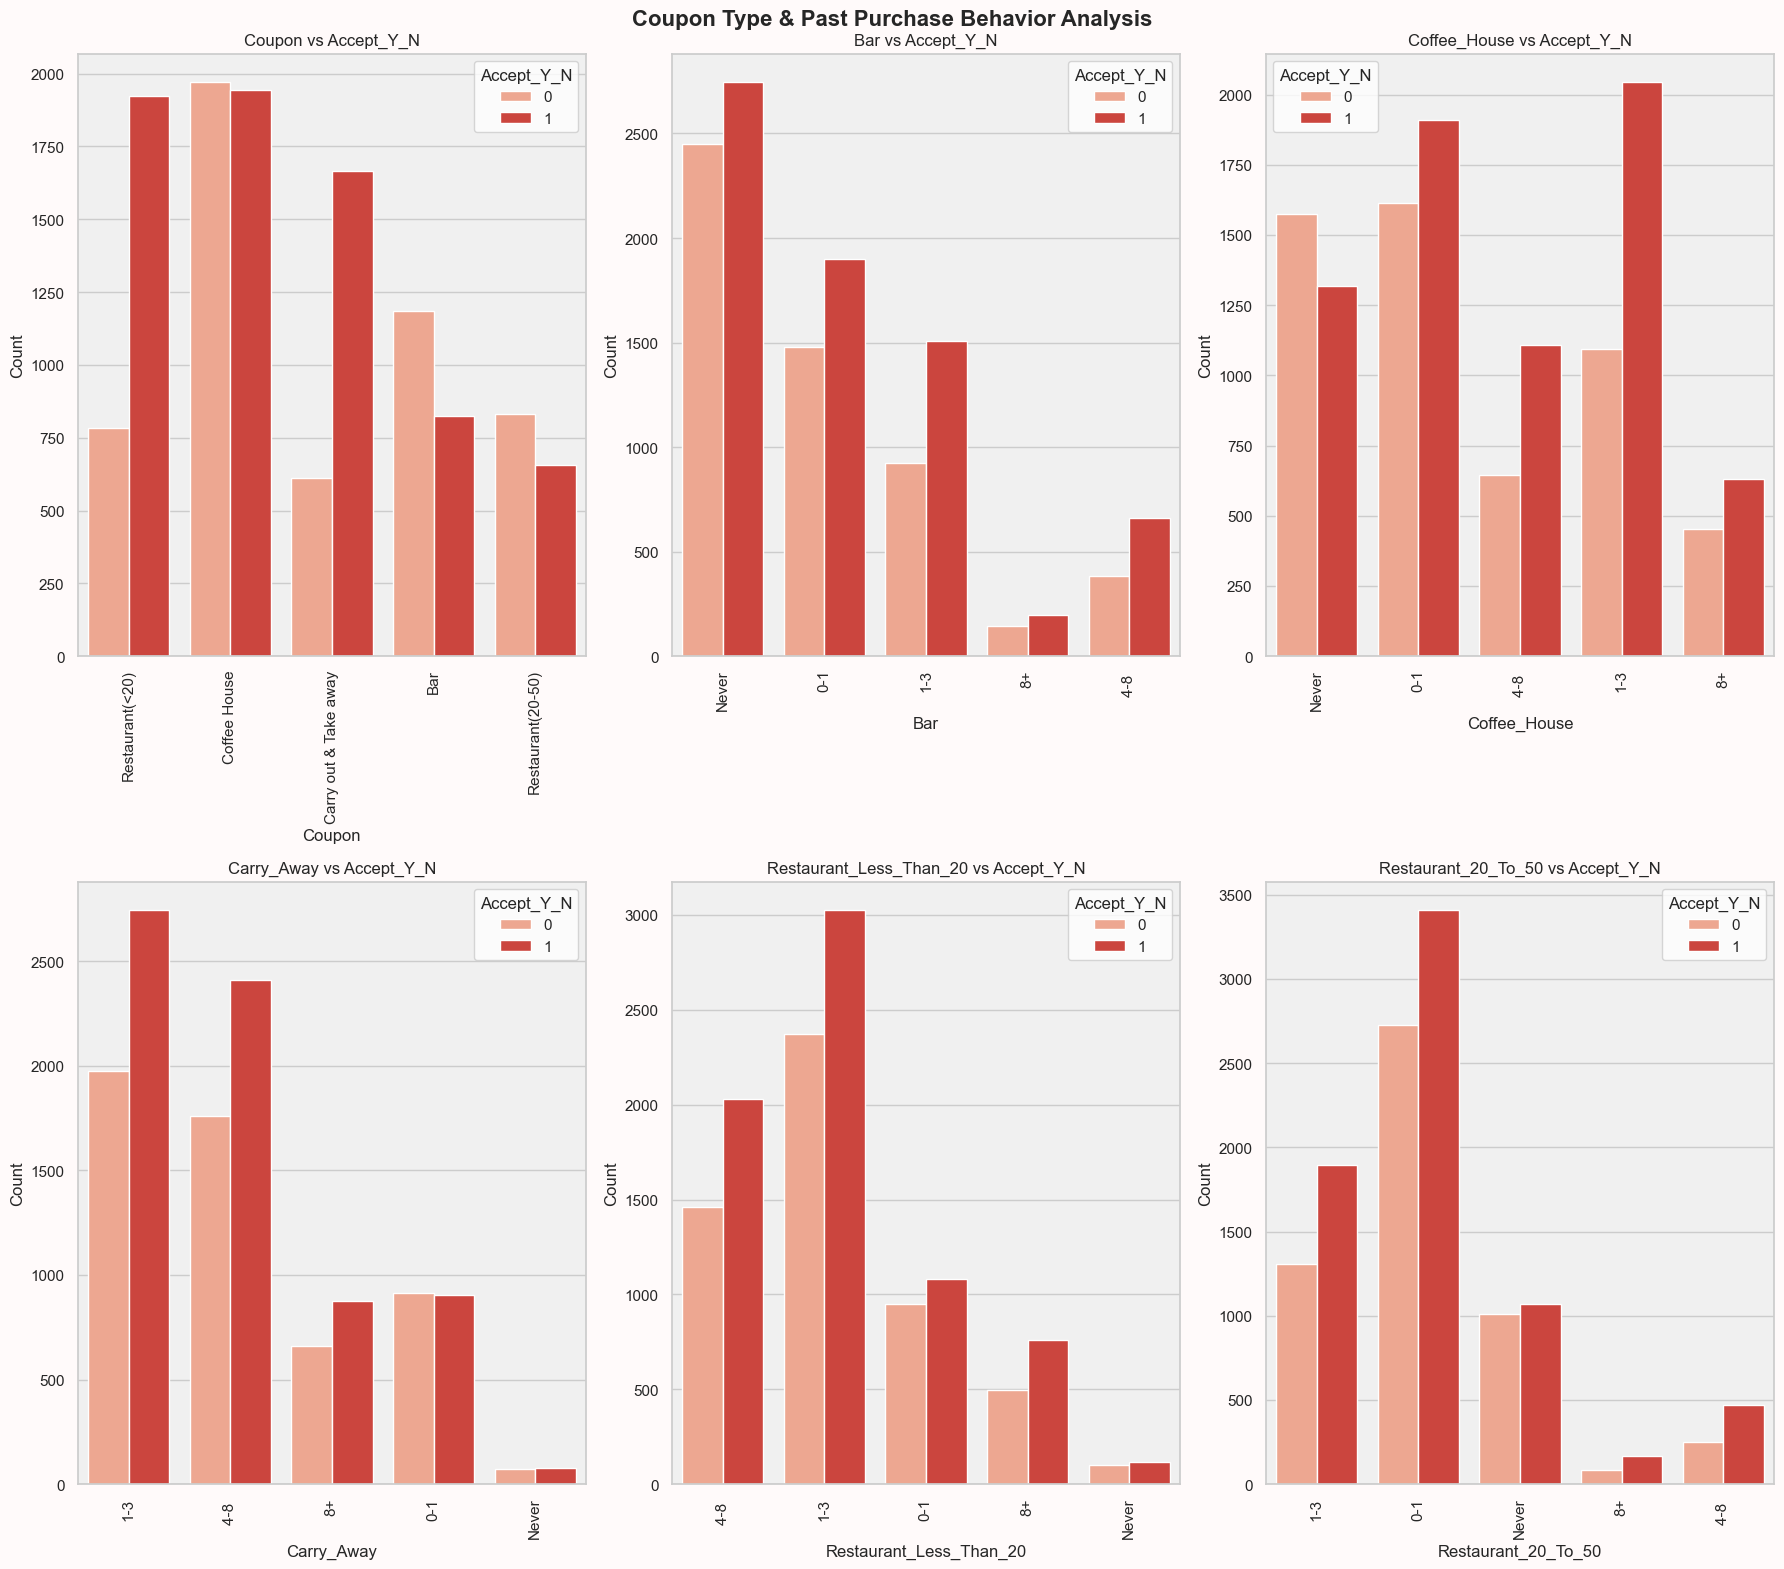

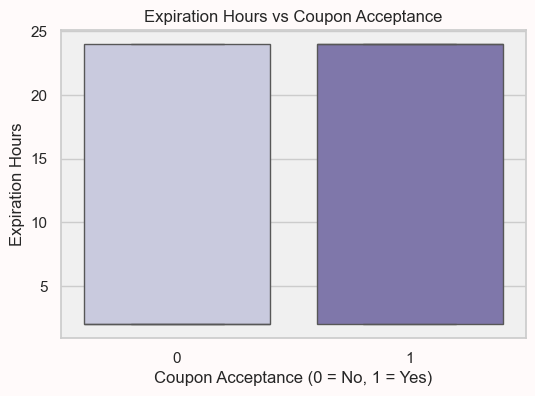

In [35]:
## plot.

fig, axs = plt.subplots(2, 3, figsize = (18, 16), facecolor = 'snow')
df3 = ['Coupon', 'Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50']

for i, feature in enumerate(df3):
    ax = axs[i // 3, i % 3]
    sns.countplot(data = data, x = feature, hue = 'Accept_Y_N', ax = ax, palette = "Reds")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('Coupon Type & Past Purchase Behavior Analysis', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

plt.figure(figsize = (6, 4), facecolor = 'snow')

sns.boxplot(data = data, x = 'Accept_Y_N', y = 'Expiration_Hours', palette = "Purples")

plt.title('Expiration Hours vs Coupon Acceptance')
plt.xlabel('Coupon Acceptance (0 = No, 1 = Yes)')
plt.ylabel('Expiration Hours')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

#### Key Insights from the Bivariate Analysis:

##### 1. Customer Demographics & Acceptance Behavior:
- Younger age groups, particularly 21-30, have a higher acceptance rate, which can inform targeting of youth-centric promotions.
- Low-income individuals show the highest acceptance rate, so offering coupons to this group could be more effective.
- Females are more likely to accept coupons than males, indicating that coupon campaigns could be tailored with more emphasis on female consumers.
- Singles accept coupons more than married individuals, which suggests flexibility in purchasing behavior.
- Parents (Has Children) tend to accept more coupons, which could be a strategy for targeting family-oriented offers.
- Individuals with no degree or associates degree are more likely to accept coupons, which could guide messaging towards less educated consumers.

##### 2. Travel Behavior & Coupon Accessibility:
- People traveling to "No Urgent Place" seem more inclined to accept coupons, suggesting flexibility in travel-related spending.
- Solo travelers are more likely to accept coupons, indicating a potential audience for offers targeting individual consumption.
- Shorter travel distances (To_Coupon_Geq_5_Min) tend to correlate with higher acceptance, suggesting that proximity to locations or convenience plays a role in decision-making.
- Driving direction also influences acceptance, with different acceptance patterns for same direction versus opposite direction.
- Weather and Temperature Bin appear to have an influence, with Sunny days leading to higher coupon acceptance. This could help in planning time-sensitive offers during favorable weather conditions.

##### 3. Coupon Type & Past Purchase Behavior:
- Coffee House and Restaurant(<20) are the most frequently accepted coupons, with low-frequency visitors showing more willingness to accept offers from restaurants.
- Frequent visits (0-1 or 1-3 times) to bars and coffee houses result in higher acceptance, implying habitual customers respond well to loyalty incentives.
- Coupons with shorter expiration times are accepted more frequently, implying urgency is a motivating factor.

#### Conclusion:
- Coupon acceptance is influenced by demographics, travel behavior, and past purchase patterns. Younger, low-income, and single individuals, as well as parents, show higher engagement. Solo travelers, short travel distances, and favorable weather increase coupon usage, emphasizing the need for convenient and time-sensitive offers. Coupons for coffee houses and affordable restaurants are most accepted, especially by habitual customers and those facing urgent expiration deadlines. These insights can help optimize targeted coupon strategies for maximum engagement.

## Multivariate Analysis

### 1. Demographics

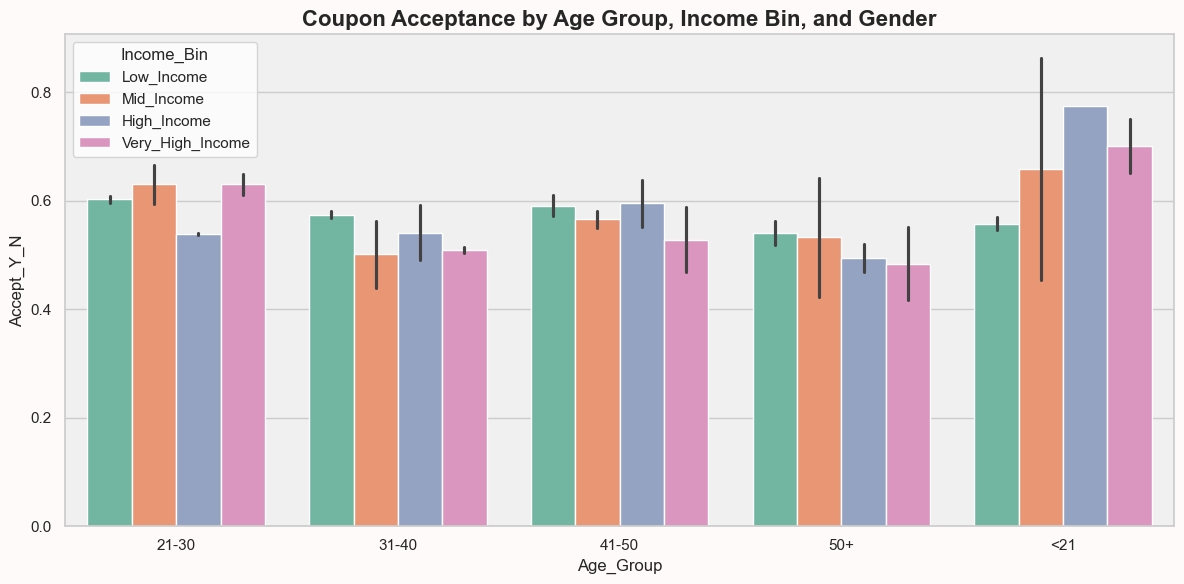

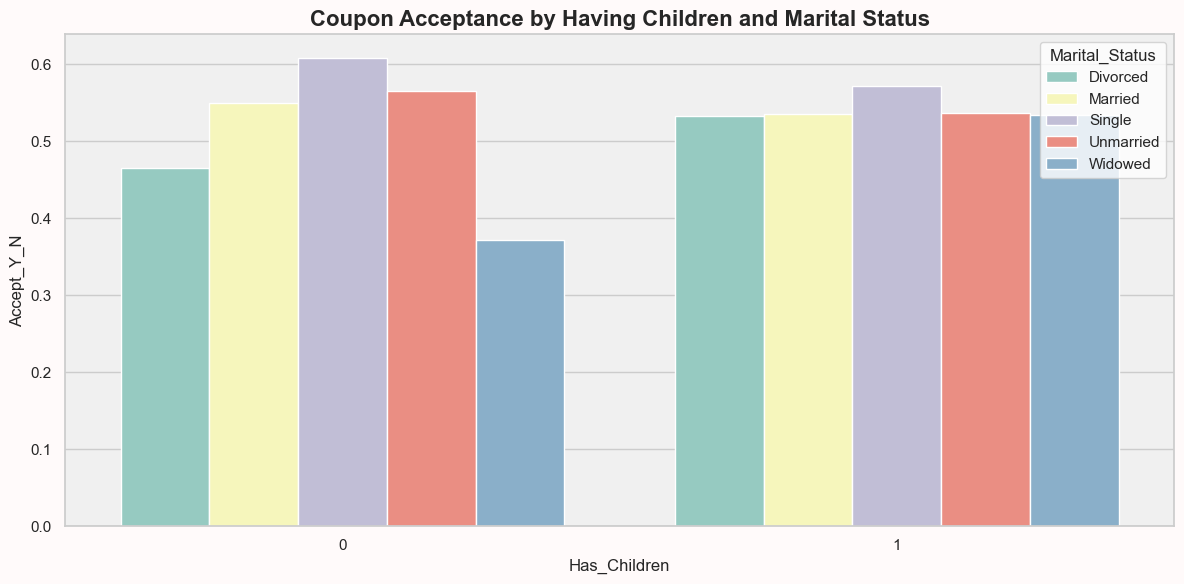

In [36]:
## age, income, gender & children, marital status..

age_income_gender = data.groupby(['Age_Group', 'Income_Bin', 'Gender'])['Accept_Y_N'].mean().reset_index()
children_marital = data.groupby(['Has_Children', 'Marital_Status'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Age_Group', y = 'Accept_Y_N', hue = 'Income_Bin', data = age_income_gender, palette = 'Set2')
plt.title('Coupon Acceptance by Age Group, Income Bin, and Gender', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Has_Children', y = 'Accept_Y_N', hue = 'Marital_Status', data = children_marital, palette = 'Set3')
plt.title('Coupon Acceptance by Having Children and Marital Status', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

### 2. Travel Behavior

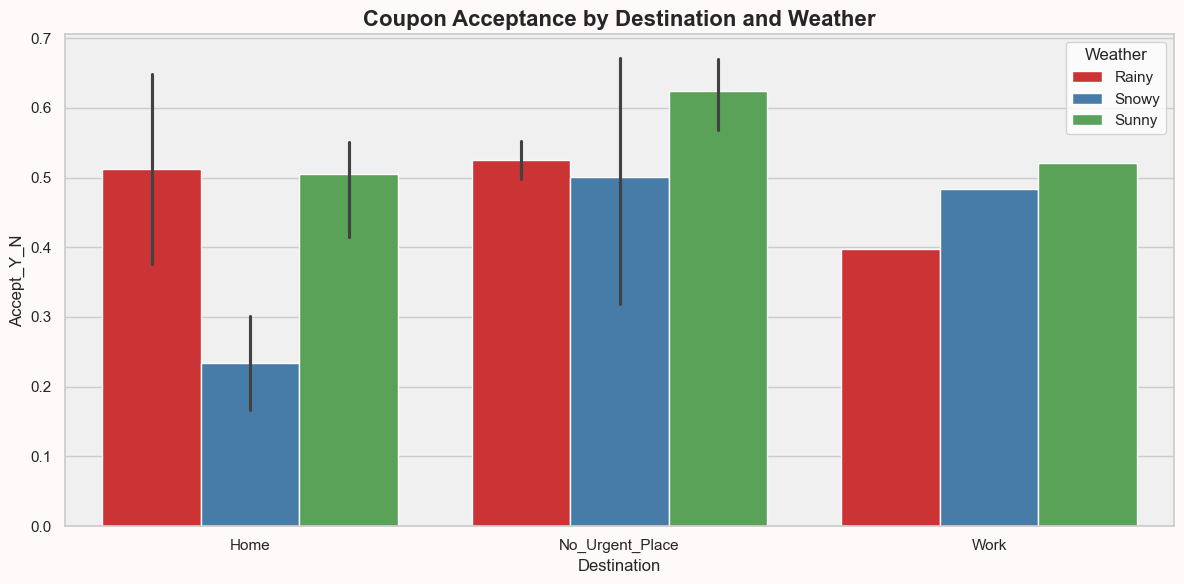

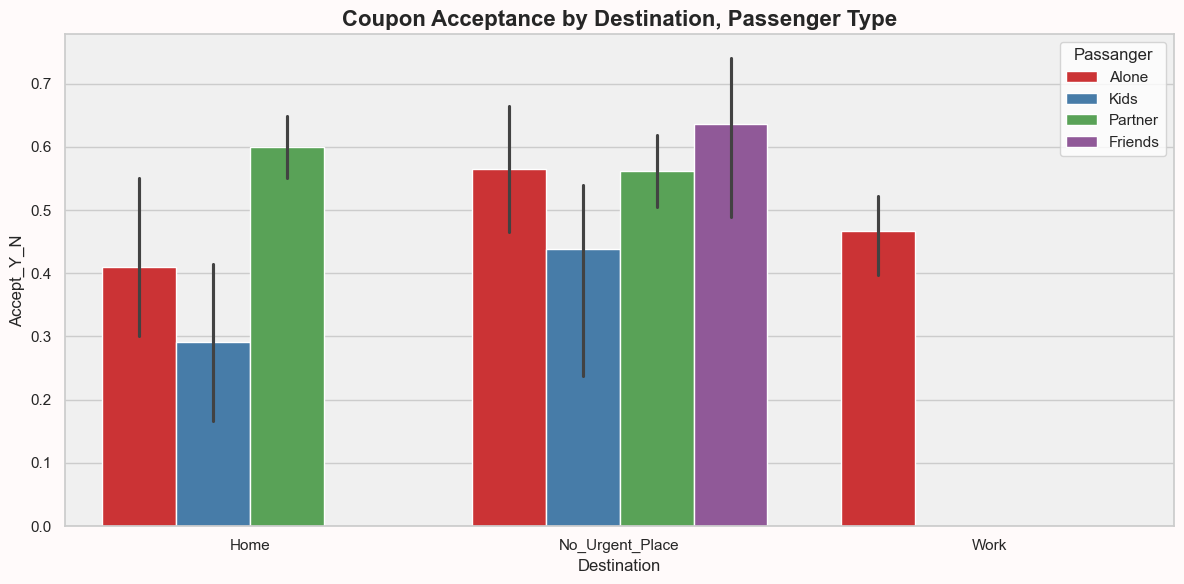

In [37]:
## destination, weather, passanger.

travel_weather = data.groupby(['Destination', 'Passanger', 'Weather'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Weather', data = travel_weather, palette = 'Set1')
plt.title('Coupon Acceptance by Destination and Weather', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Passanger', data = travel_weather, palette = 'Set1')
plt.title('Coupon Acceptance by Destination, Passenger Type', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

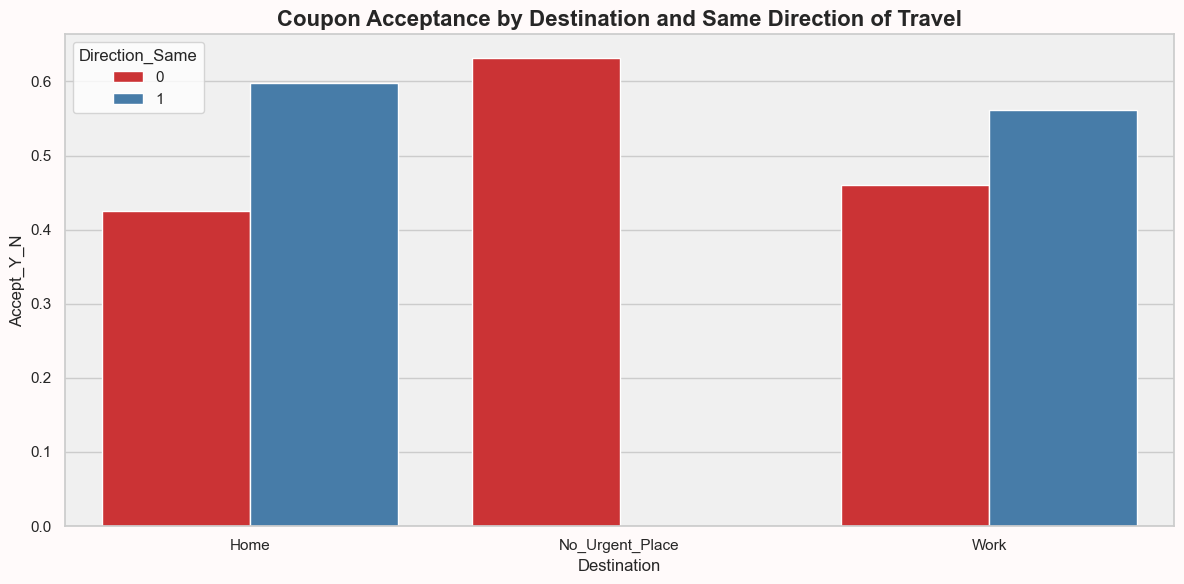

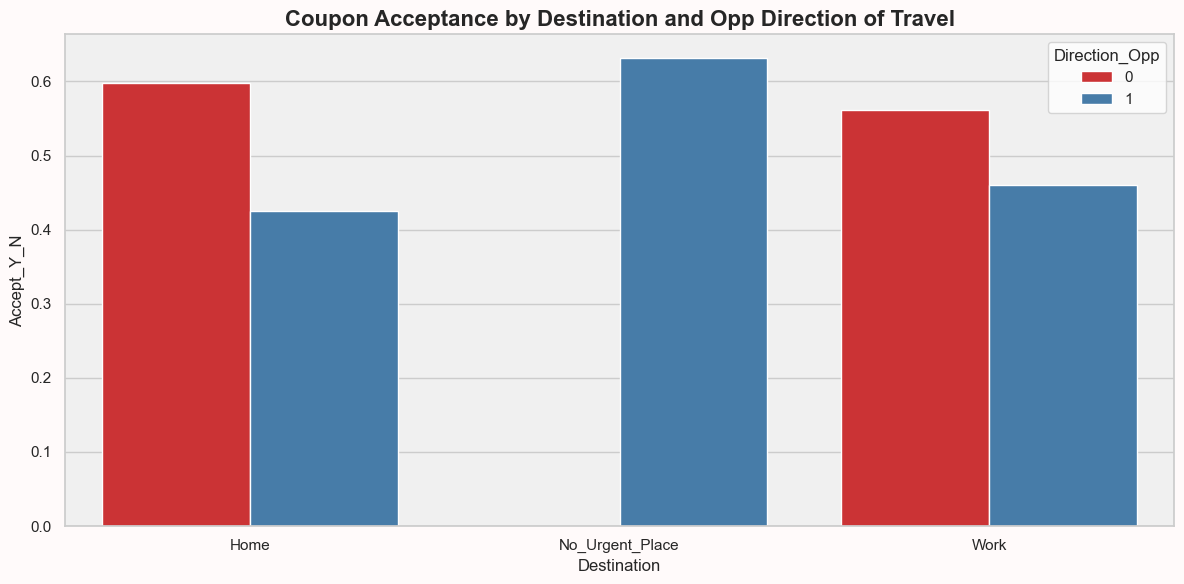

In [38]:
## destination, directions.

direction_destination = data.groupby(['Destination', 'Direction_Same', 'Direction_Opp'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Direction_Same', data = direction_destination, palette = 'Set1')
plt.title('Coupon Acceptance by Destination and Same Direction of Travel', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Direction_Opp', data = direction_destination, palette = 'Set1')
plt.title('Coupon Acceptance by Destination and Opp Direction of Travel', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

### 3. Coupon Usage

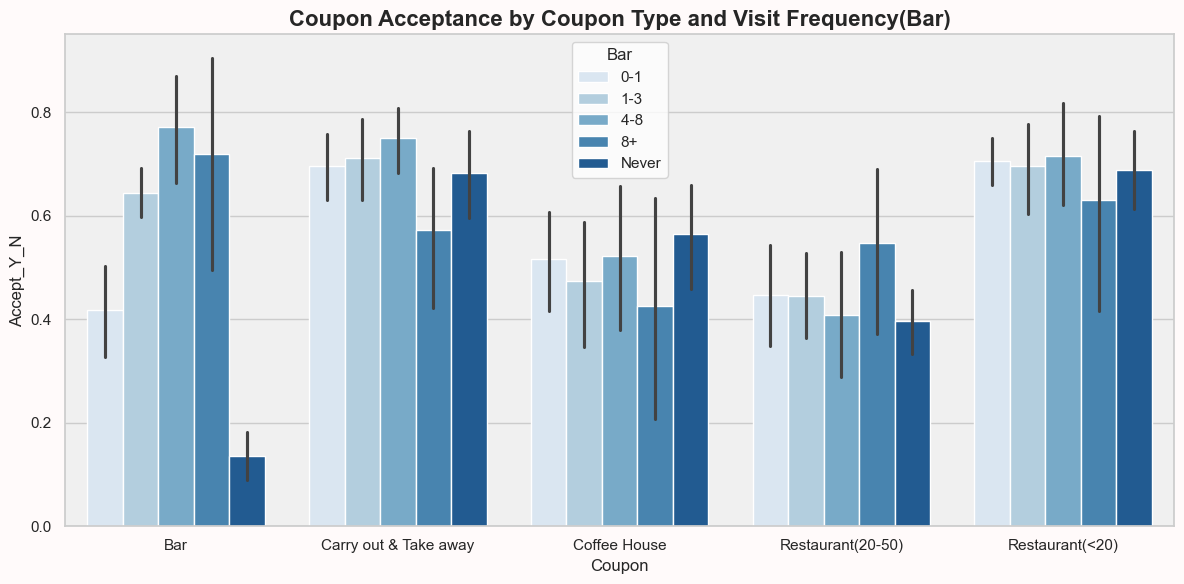

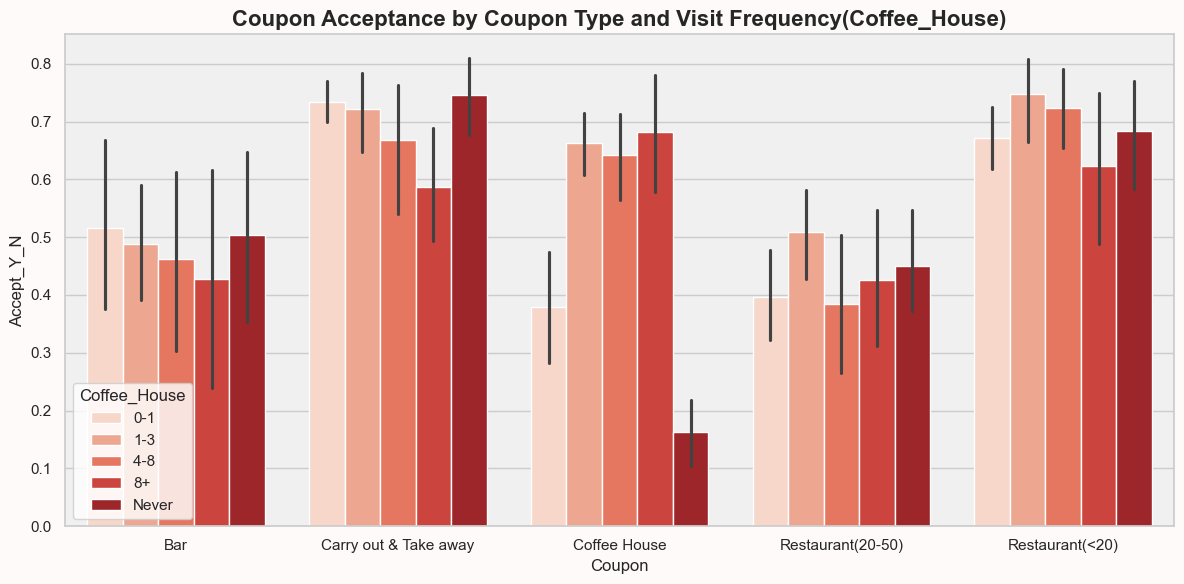

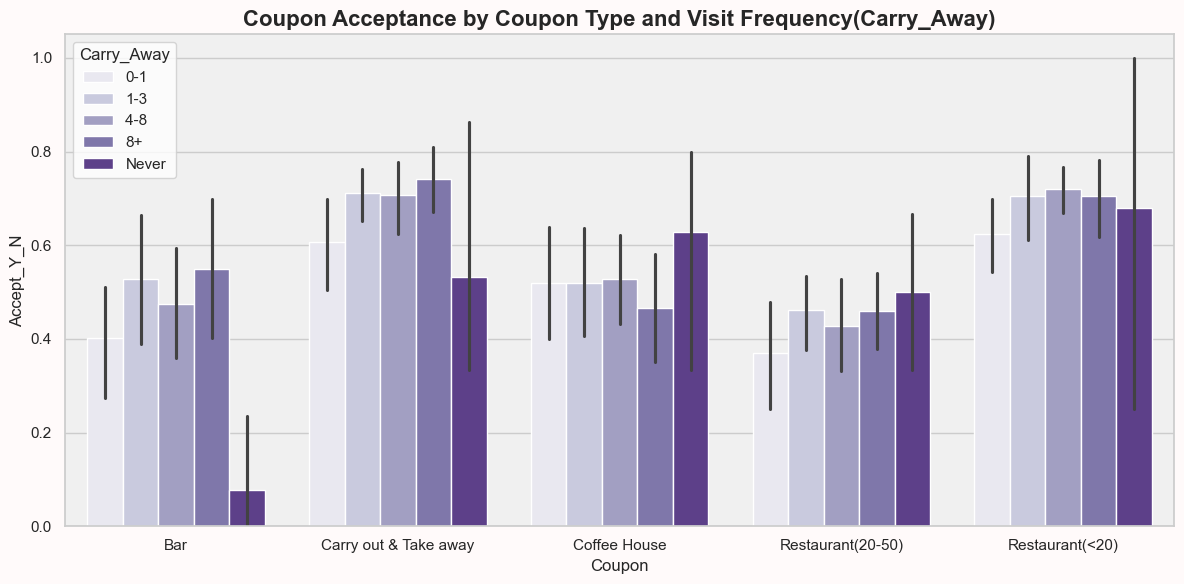

In [39]:
## coupon usage.

coupon_visit_group = data.groupby(['Coupon', 'Bar', 'Coffee_House', 'Carry_Away'])['Accept_Y_N'].mean().reset_index()
expiration_group = data.groupby(['Expiration_Hours', 'Coupon'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Bar', data = coupon_visit_group, palette = 'Blues')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Bar)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Coffee_House', data = coupon_visit_group, palette = 'Reds')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Coffee_House)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Carry_Away', data = coupon_visit_group, palette = 'Purples')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Carry_Away)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

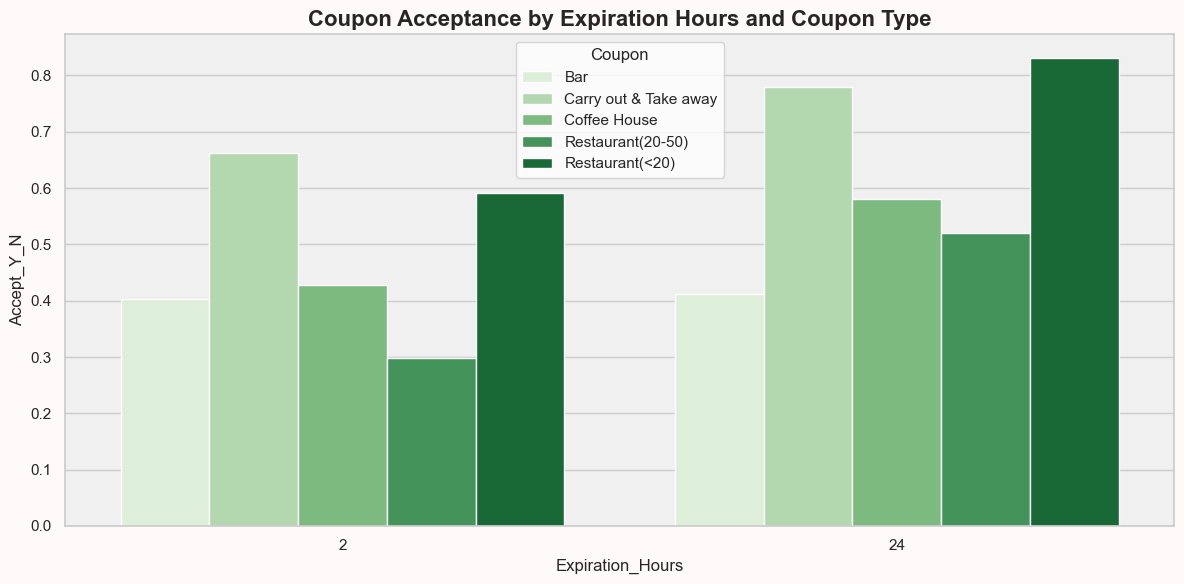

In [40]:
## expiration_hours.

expiration = data.groupby(['Expiration_Hours', 'Coupon'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Expiration_Hours', y = 'Accept_Y_N', hue = 'Coupon', data = expiration, palette = 'Greens')
plt.title('Coupon Acceptance by Expiration Hours and Coupon Type', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

#### Key Insights from Multivariate Analysis

##### 1.Demographics & Acceptance Behavior:

- Younger individuals (21-30) and low-income groups show higher coupon acceptance.
- Females accept coupons more than males, and single individuals accept more than married ones.
- Parents tend to accept coupons more, likely due to family-oriented spending habits.
- Travel Behavior & Coupon Accessibility:

##### 2. Travelers heading to work or home are more likely to accept coupons.

- Solo travelers show higher acceptance rates, making them a key target group.
- Bad weather (rain/snow) influences coupon usage, with indoor-friendly offers being more attractive.
- Travel direction impacts engagement—coupons aligned with a customer’s route have better acceptance.

##### 3.Coupon Usage Patterns:

- Habitual customers (frequent visitors) are more likely to accept coupons for places they visit often, like coffee houses or restaurants.
- Shorter expiration times drive higher engagement due to urgency, while longer expirations may appeal to planners.

#### Conclusion:
- Coupon effectiveness is influenced by demographics, travel behavior, and urgency. Targeting younger, low-income individuals, solo travelers, and frequent customers with well-timed, location-relevant offers can boost engagement. Urgent, short-term coupons are more effective, especially when aligned with travel routes and weather conditions.

### corr_matrix

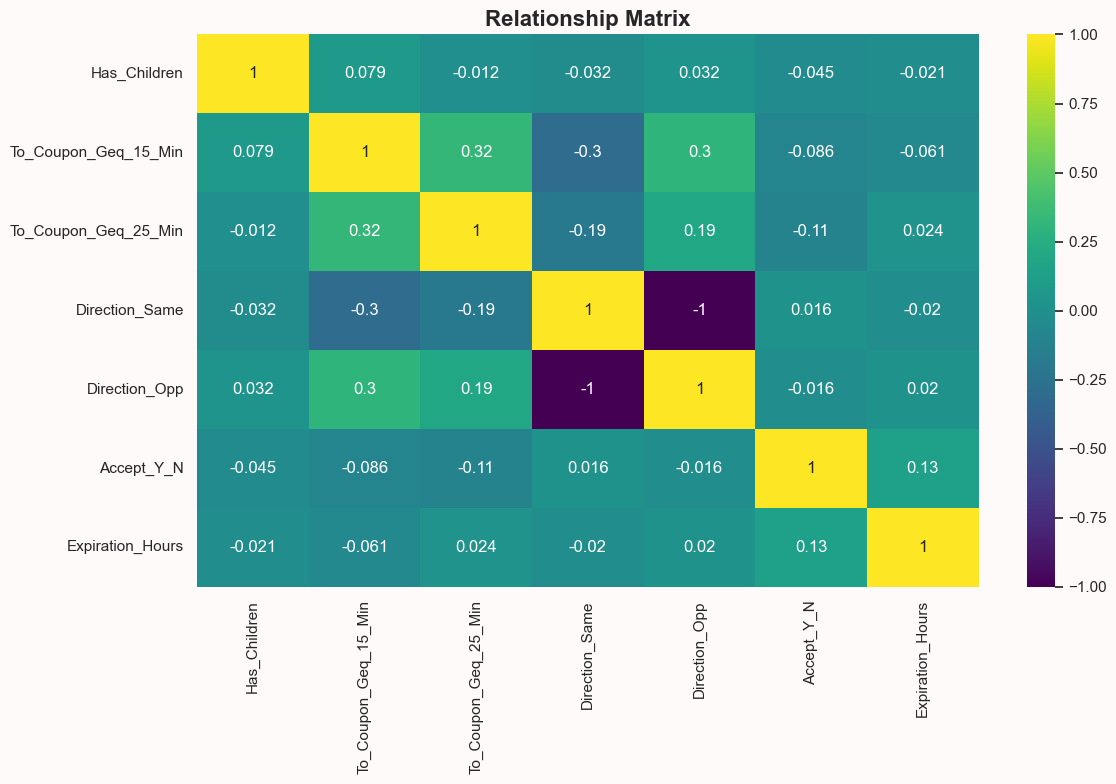

In [41]:
## relationship.

matrix = data.select_dtypes(include = np.number).drop('To_Coupon_Geq_5_Min', axis = 1)
corrm = matrix.corr()

plt.figure(figsize = (12, 8),\
           facecolor = 'snow')

sns.heatmap(corrm,\
            annot = True,\
            cbar = True,\
            cmap = 'viridis',\
           )

plt.title('Relationship Matrix', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

### Observations:

- The correlations with Accept_Y_N are relatively weak, meaning that the target variable does not have a strong linear relationship with the individual features.
- The strongest correlation is with Expiration_Hours (0.128379), suggesting a mild positive relationship where longer expiration times may increase the likelihood of coupon acceptance.

<Figure size 1000x1400 with 0 Axes>

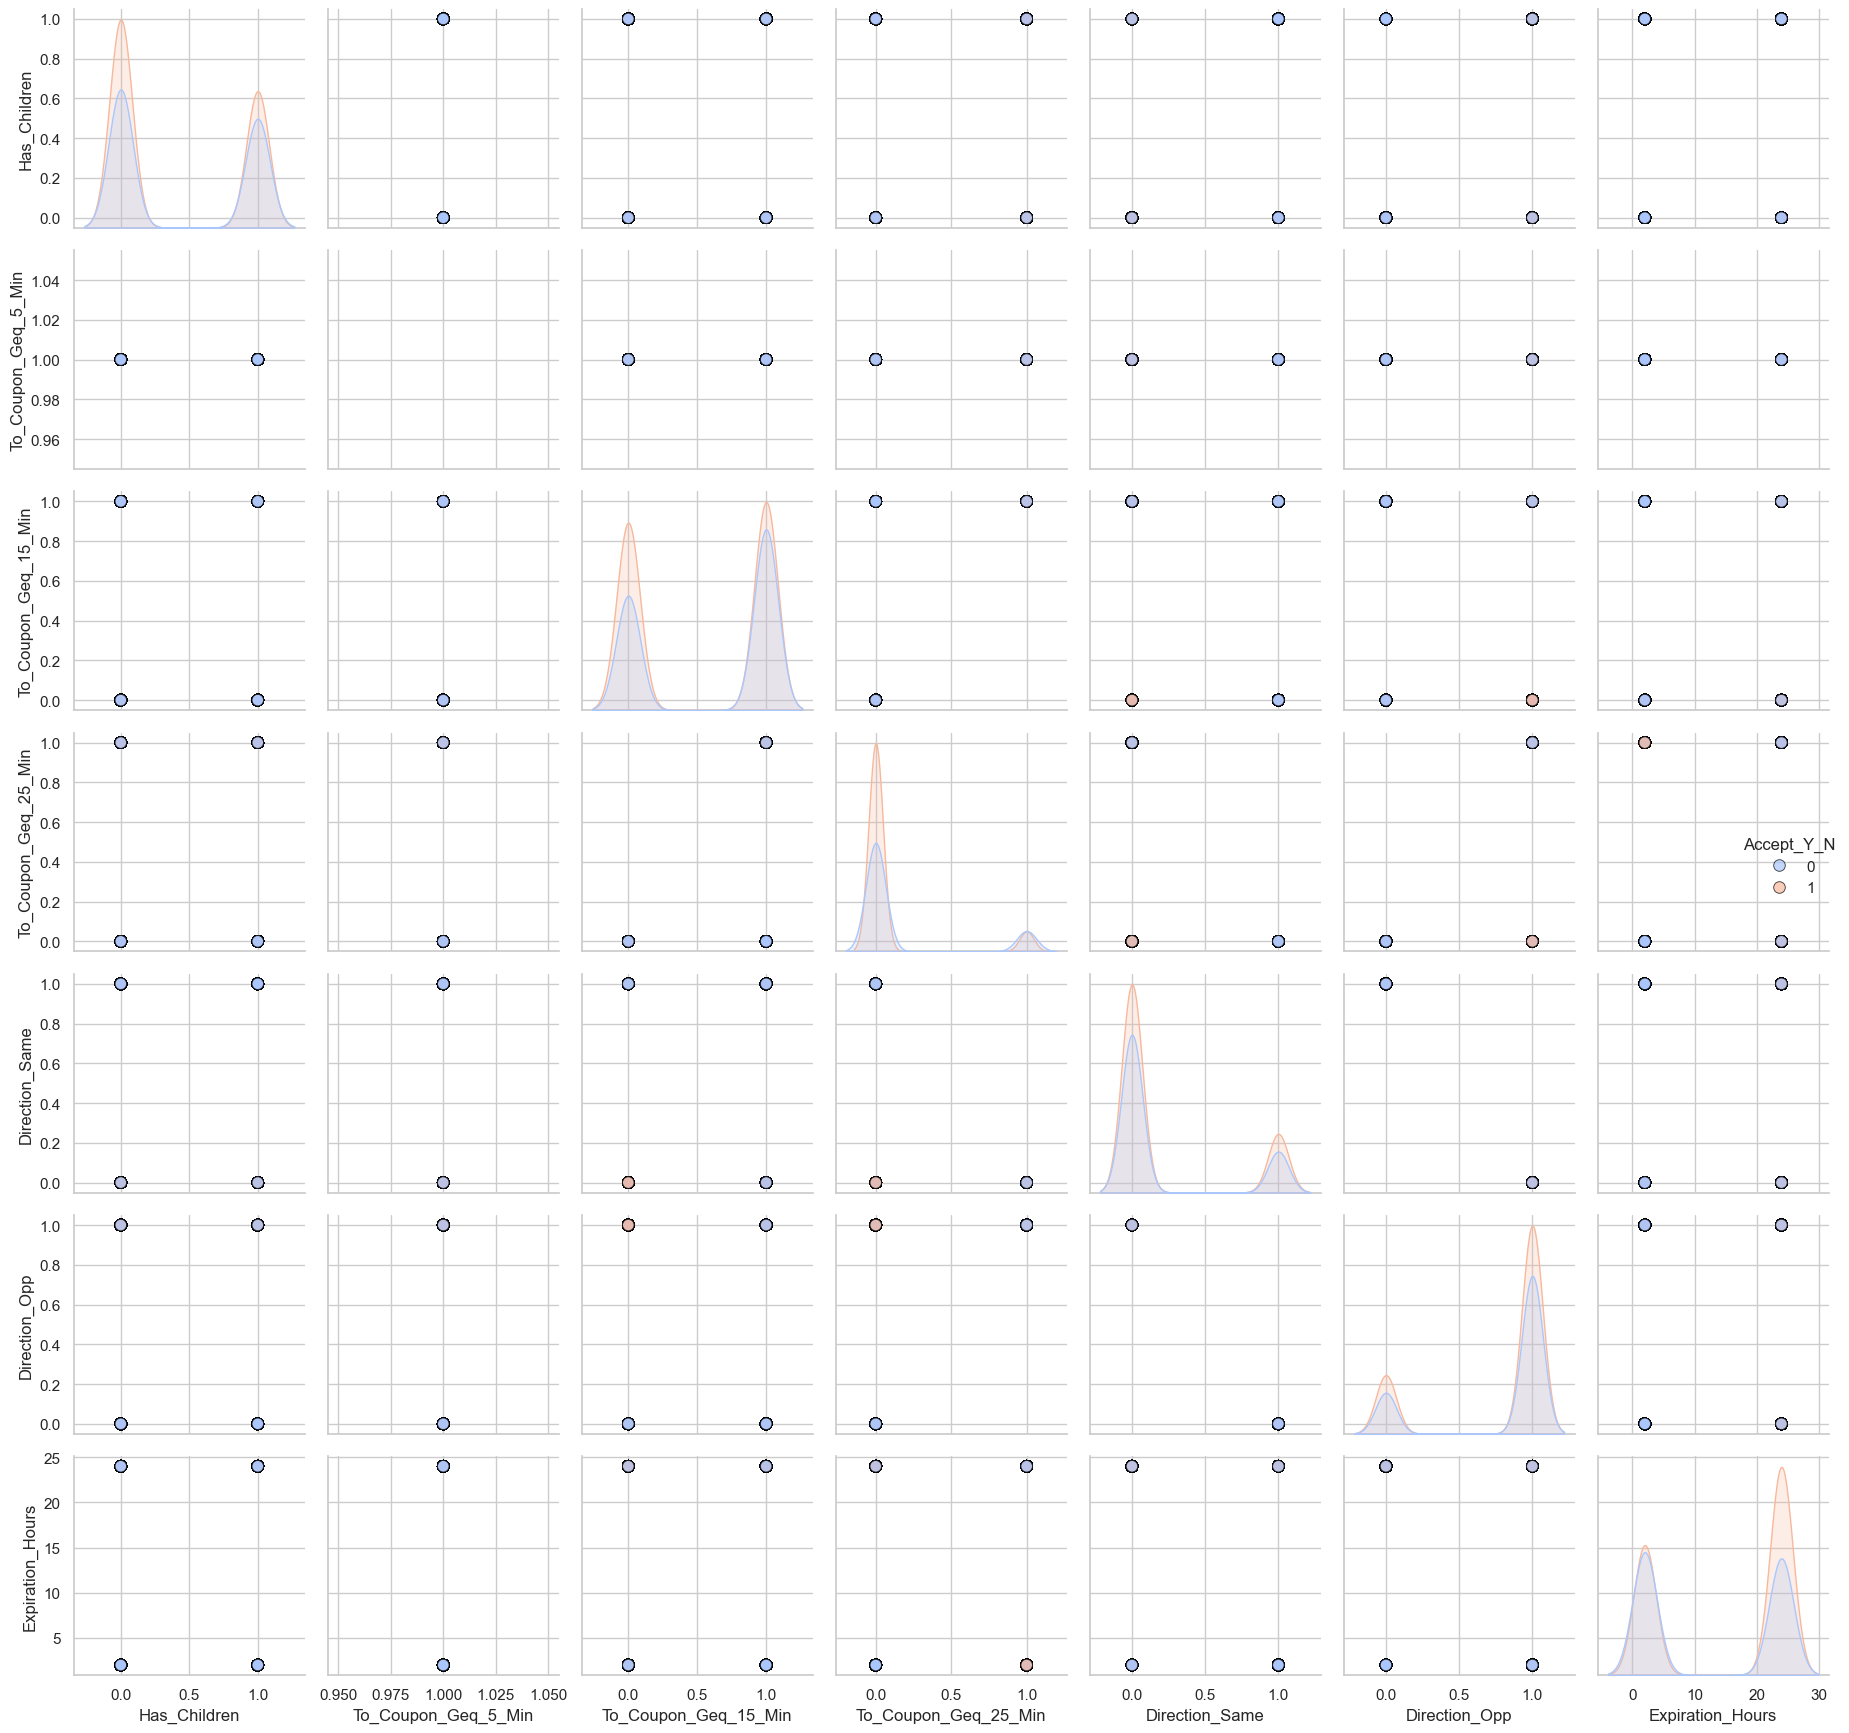

In [42]:
## plot.

pair_cols = data.select_dtypes(include = np.number)

plt.figure(figsize = (10, 14), facecolor = 'snow')
pairplot = sns.pairplot(pair_cols,\
                        height = 2.5,\
                        plot_kws = {'alpha': 0.7, 's': 70, 'edgecolor': 'black'},\
                        kind = "scatter",\
                        diag_kind = "kde",\
                        markers = 'o',\
                        hue = 'Accept_Y_N',\
                        palette = 'coolwarm'
)
plt.tight_layout()
plt.show()

# Feature Engineering

## Feature Encoding

In [43]:
ordinal_features = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
                    'Temperature_Bin', 'Age_Group', 'Income_Bin']
onehot_features = ['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender', 'Marital_Status', 'Education', 'Occupation']

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
data[ordinal_features] = oe.fit_transform(data[ordinal_features])

oh = OneHotEncoder(handle_unknown = 'ignore', drop = 'first')
encoded_array = oh.fit_transform(data[onehot_features]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns = oh.get_feature_names_out(onehot_features))
data = pd.concat([data.drop(columns = onehot_features), encoded_df], axis = 1)

In [44]:
## changes in columns names.

data.columns = data.columns.str.replace('20-50', '20_To_50').str.replace('<20', 'LessThan_20').str.replace('(', ' ').str.replace(')', '').\
str.replace('[', '_').str.replace(']', '_').str.strip()

## Data Imbalanced

In [45]:
## smote.

pred = data.drop('Accept_Y_N', axis = 1)
res = data['Accept_Y_N']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(pred, res)
data = pd.concat([x_smote, y_smote], axis = 1)
data['Accept_Y_N'].value_counts(), data.shape

(Accept_Y_N
 1    7012
 0    7012
 Name: count, dtype: int64,
 (14024, 61))

## Correlation Matrix

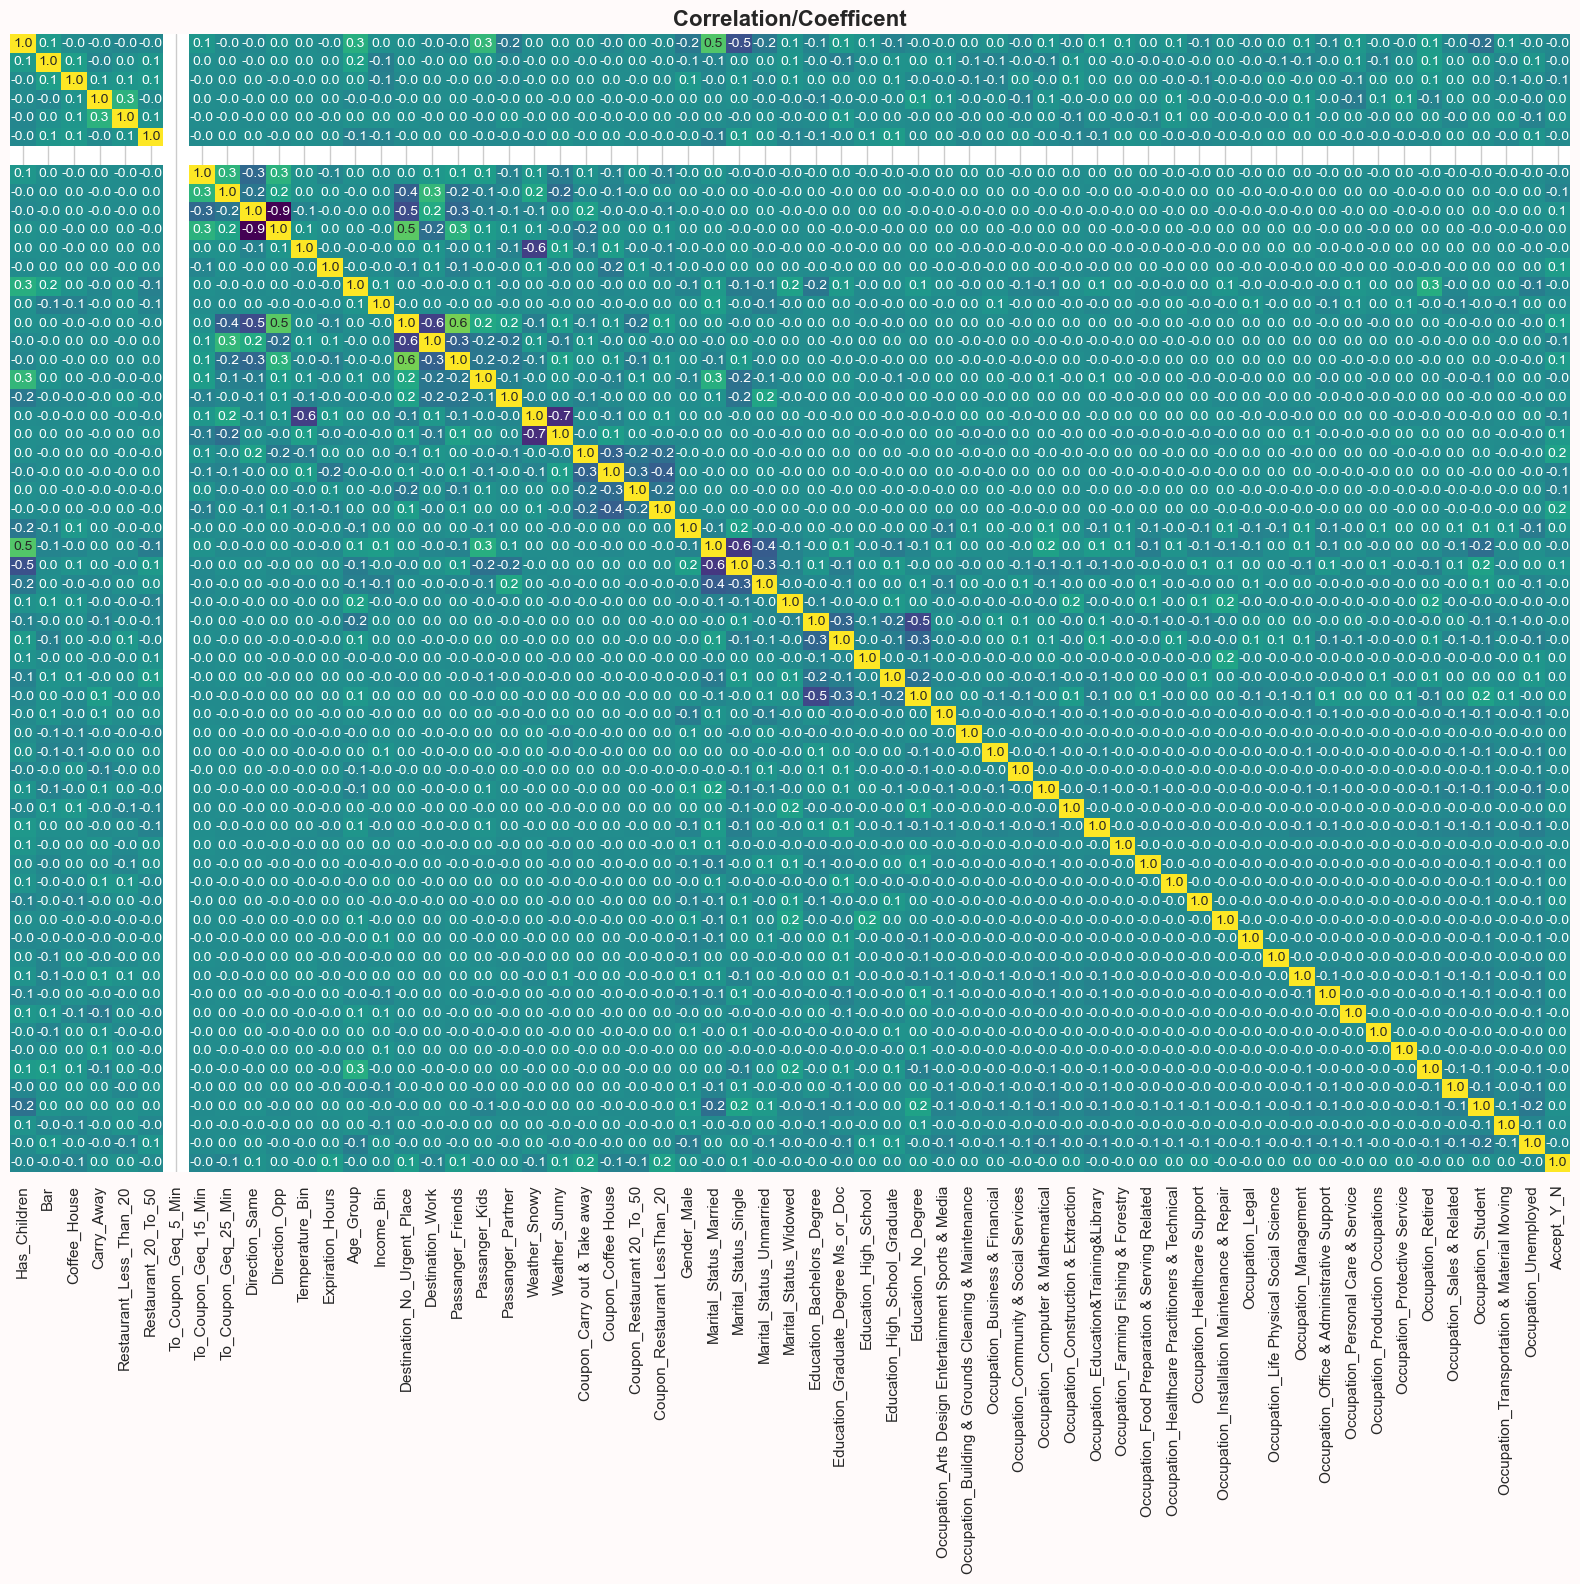

In [46]:
## corr matrix.

plt.figure(figsize = (16, 16),\
           facecolor = 'snow')

sns.heatmap(data.corr(),\
            annot = True,
            cbar = False,\
            cmap = 'viridis',\
            fmt = '.1f',\
            annot_kws = {'size': 10})

plt.yticks([])
plt.title('Correlation/Coefficent', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

## Multicollinearity 

In [47]:
## mulitcolinearity.

X = data.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(tb(vif_data, headers = 'keys', tablefmt = 'grid'))

+----+------------------------------------------------------+-----------+
|    | Feature                                              |       VIF |
+====+======================================================+===========+
|  0 | Has_Children                                         |   1.96157 |
+----+------------------------------------------------------+-----------+
|  1 | Bar                                                  |   1.19206 |
+----+------------------------------------------------------+-----------+
|  2 | Coffee_House                                         |   1.14454 |
+----+------------------------------------------------------+-----------+
|  3 | Carry_Away                                           |   1.24285 |
+----+------------------------------------------------------+-----------+
|  4 | Restaurant_Less_Than_20                              |   1.19717 |
+----+------------------------------------------------------+-----------+
|  5 | Restaurant_20_To_50            

In [48]:
## dropping some columns.

v_data = data.drop(['To_Coupon_Geq_5_Min', 'Direction_Opp', 'Occupation_Student', 'Occupation_Unemployed',\
                    'Destination_No_Urgent_Place', 'Weather_Sunny', 'Marital_Status_Married', 'Temperature_Bin',\
                    'Education_Bachelors_Degree'], axis = 1)

In [49]:
## mulitcolinearity after dropping highly correlated features.

X = v_data.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(tb(vif_data, headers = 'keys', tablefmt = 'grid'))

+----+------------------------------------------------------+---------+
|    | Feature                                              |     VIF |
+====+======================================================+=========+
|  0 | Has_Children                                         | 3.04347 |
+----+------------------------------------------------------+---------+
|  1 | Bar                                                  | 2.87727 |
+----+------------------------------------------------------+---------+
|  2 | Coffee_House                                         | 2.56703 |
+----+------------------------------------------------------+---------+
|  3 | Carry_Away                                           | 4.12194 |
+----+------------------------------------------------------+---------+
|  4 | Restaurant_Less_Than_20                              | 3.67759 |
+----+------------------------------------------------------+---------+
|  5 | Restaurant_20_To_50                                  | 1.

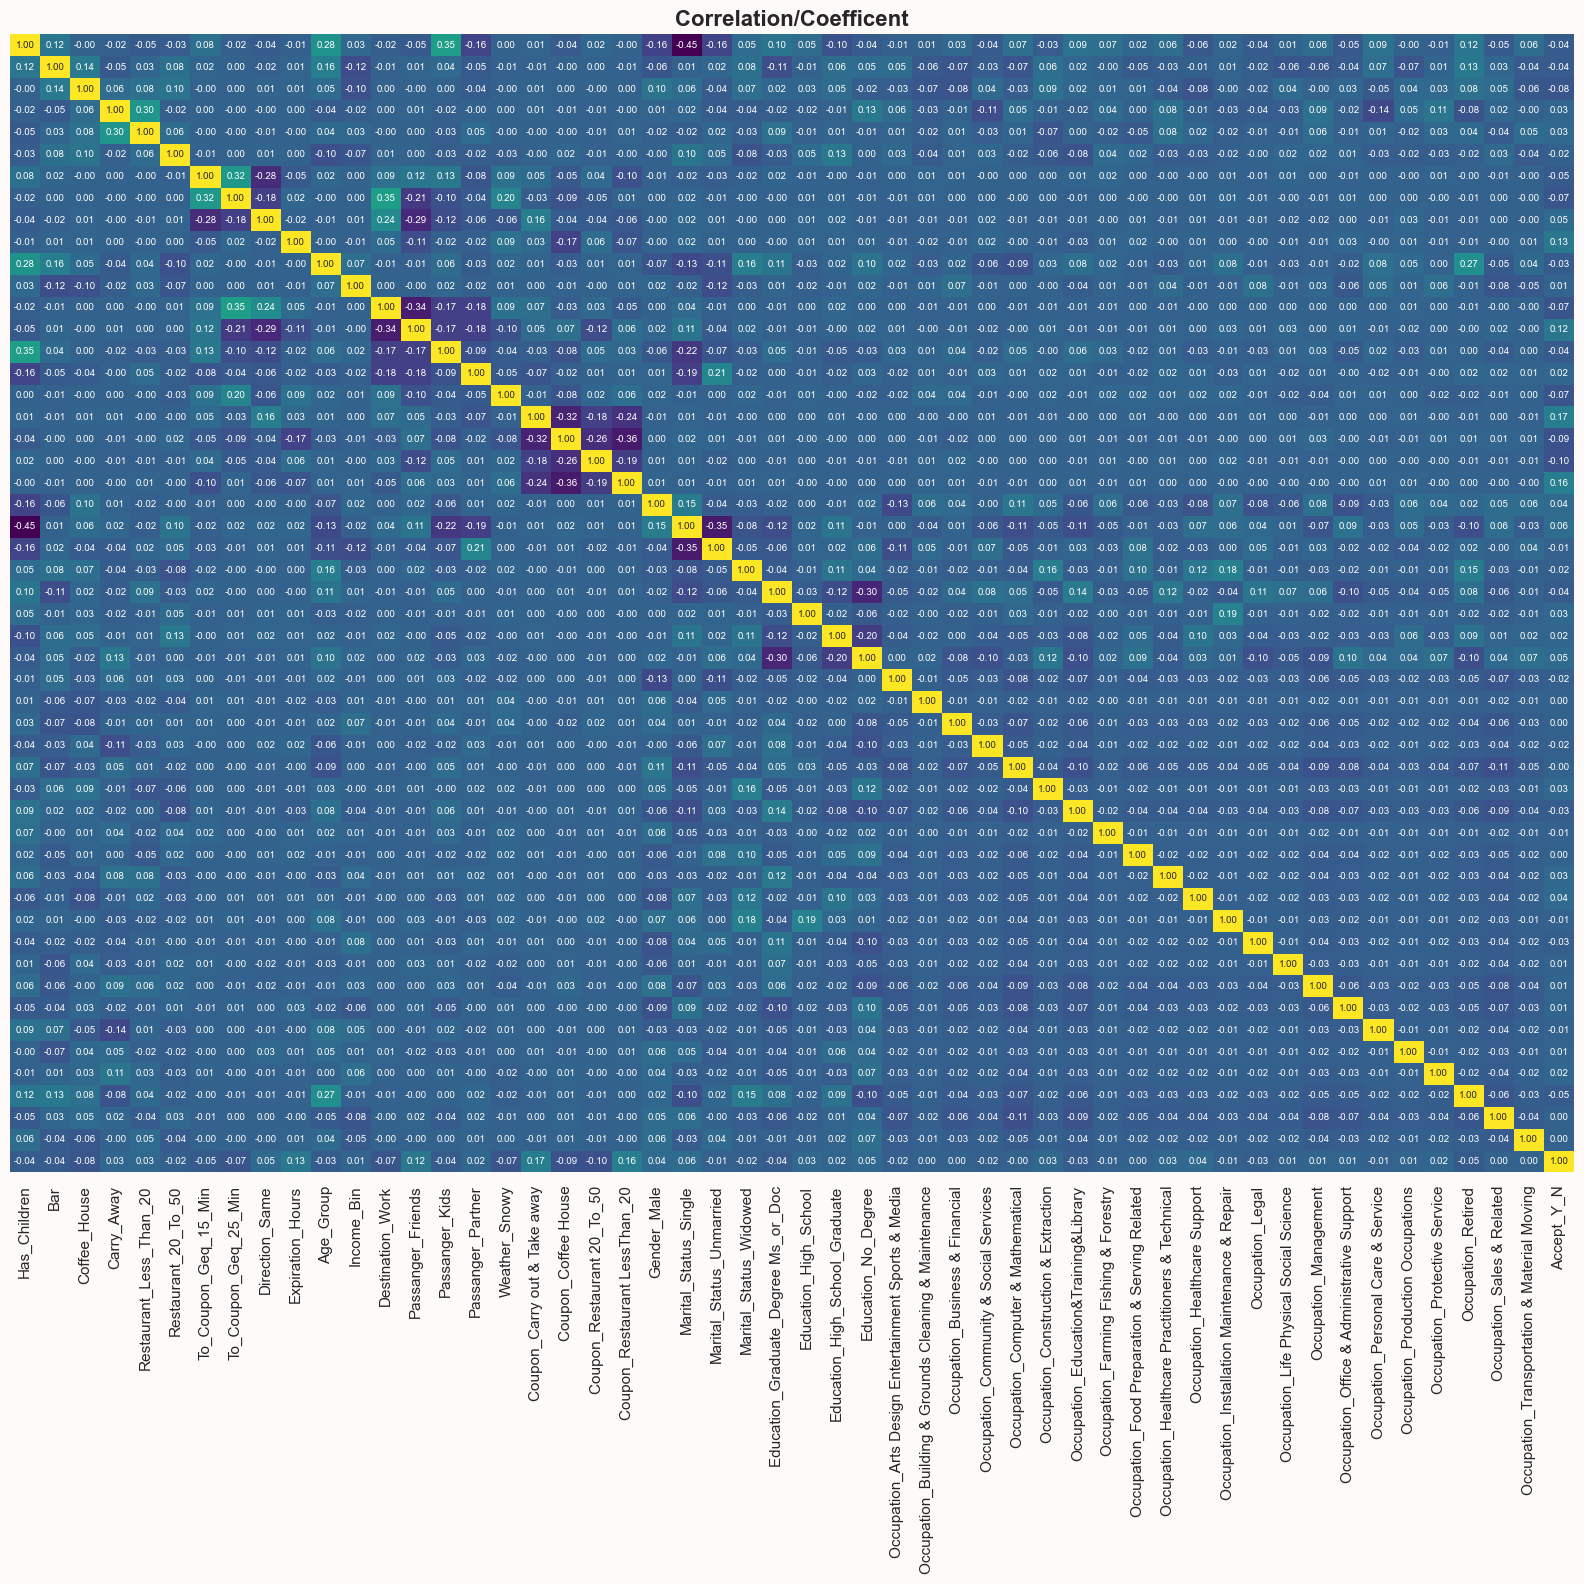

In [50]:
## corr matrix after VIF.

plt.figure(figsize = (16, 16),\
           facecolor = 'snow')

sns.heatmap(v_data.corr(),\
            annot = True,
            cbar = False,\
            cmap = 'viridis',\
            fmt = '.2f',\
            annot_kws = {'size': 7})

plt.yticks([])
plt.title('Correlation/Coefficent', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

In [51]:
## X, y.

X = v_data.drop('Accept_Y_N', axis = 1)
y = v_data['Accept_Y_N']

## Feature Scaling

In [52]:
## scaling.

scaling_features = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
                    'Age_Group', 'Income_Bin', 'Expiration_Hours']

scaler = StandardScaler()
v_data[scaling_features] = scaler.fit_transform(v_data[scaling_features].values)

# Models

In [53]:
## splitting.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11219, 51), (2805, 51), (11219,), (2805,))

In [54]:
## function for roc_auc.

def plot_roc_auc_with_accuracy(model, X_train, y_train, X_test, y_test, sf):
    y_prob_train = model.predict_proba(X_train[sf])[:, 1]
    y_prob_test = model.predict_proba(X_test[sf])[:, 1]
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize = (8, 6))
    plt.plot(fpr_train, tpr_train, color = 'blue', label = f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color = 'green', label = f'Test ROC curve (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Train and Test - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

## 1. Baseline Model(Logistic Regression, KNearestNeighbors)

Logistic Regression

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters CV_Scores: 0.659239599053661
Best Hyperparameters Estimator: LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')
Train Accuracy: 0.6613780194313219
Test Accuracy: 0.6752228163992869
Precision: 0.6837037037037037
Recall: 0.6560056858564322
F1-Score: 0.6695683714182082
----------------------------------------------------------------------------------------------------


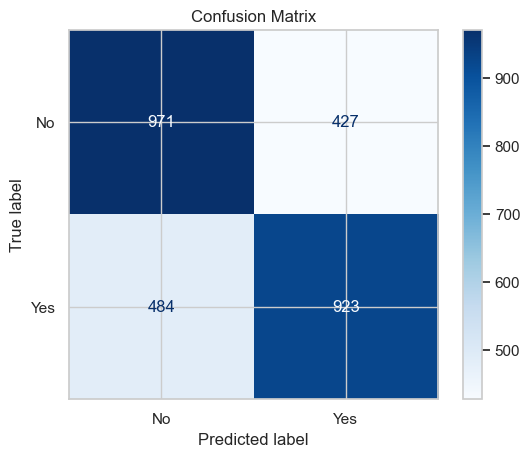

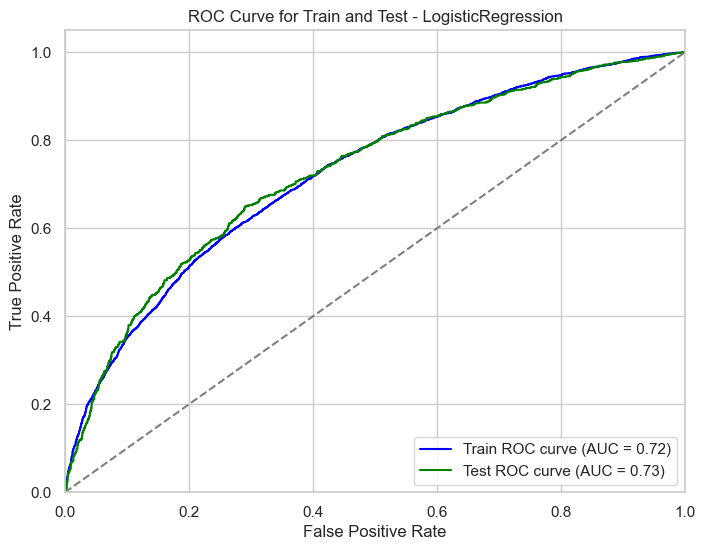


              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1398
           1       0.68      0.66      0.67      1407

    accuracy                           0.68      2805
   macro avg       0.68      0.68      0.68      2805
weighted avg       0.68      0.68      0.68      2805



In [55]:
## logistic regression.

# model & RFE
lr_model = LogisticRegression(max_iter = 1000)
selector1 = RFE(estimator = lr_model, n_features_to_select = 50, step = 1)

# model train
selector1.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector1.support_]
rfe_feature_importance1 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear']
}

# Kfold technique for tune
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)  

# GridSearchCV with Logistic Regression
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter = 1000), param_grid = param_grid,\
                           scoring = 'accuracy', cv = kf, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model1 = grid_search.best_estimator_

# prediction
pred_train = best_model1.predict(X_train[selected_features])
pred_test = best_model1.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores1 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Logistic Regression\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print('Best Hyperparameters Estimator:', best_model1)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model1, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

KNeighborsClassifier

Best Hyperparameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Best Hyperparameters CV_Scores: 0.6918605169340465
Train Accuracy: 0.7266244763347892
Test Accuracy: 0.6777183600713013
Precision: 0.673567977915804
Recall: 0.6936744847192609
F1-Score: 0.6834733893557423
----------------------------------------------------------------------------------------------------


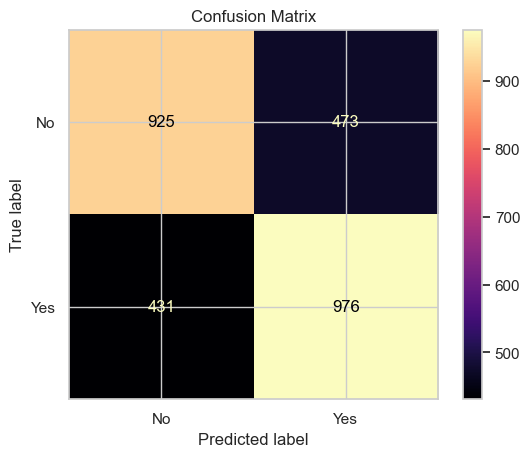

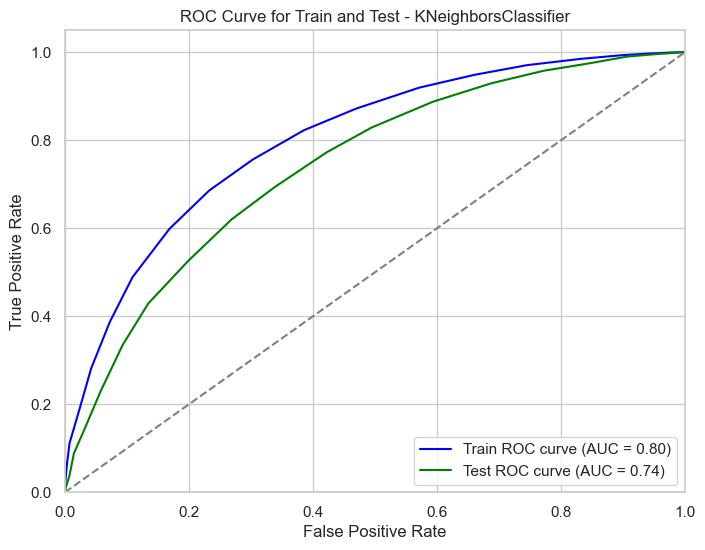


              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1398
           1       0.67      0.69      0.68      1407

    accuracy                           0.68      2805
   macro avg       0.68      0.68      0.68      2805
weighted avg       0.68      0.68      0.68      2805



In [56]:
## knn.

# model & mic
selector2 = SelectKBest(score_func = mutual_info_classif, k = 17)
X_train_selected = selector2.fit_transform(X_train, y_train)
X_test_selected = selector2.transform(X_test)

# Store best features into a dictionary
selected_features = X_train.columns[selector2.get_support()]
mic_feature_importance2 = {feature: selector2.scores_[i] for i, feature in enumerate(selected_features)}

# hyperparameter tune using GridSearchCV
param_grid = {
    'n_neighbors': [15, 17, 19, 21], 
    'weights': ['uniform'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

# Kfold technique for tune
v = StratifiedKFold(n_splits = 20, shuffle = True, random_state = 42)

# GridSearchCV with KNN
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid,\
                           scoring = 'accuracy', cv = v, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model2 = grid_search.best_estimator_

# prediction
pred_train = best_model2.predict(X_train[selected_features])
pred_test = best_model2.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores2 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('KNeighborsClassifier\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'magma')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model2, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

Naive Bayes

Best Hyperparameters: {'alpha': 0.001, 'binarize': 0.7, 'fit_prior': True}
Best Hyperparameters CV_Scores: 0.6344580483911819
Train Accuracy: 0.6384704519119351
Test Accuracy: 0.6488413547237076
Precision: 0.6574626865671642
Recall: 0.6261549395877755
F1-Score: 0.6414270112850382
----------------------------------------------------------------------------------------------------


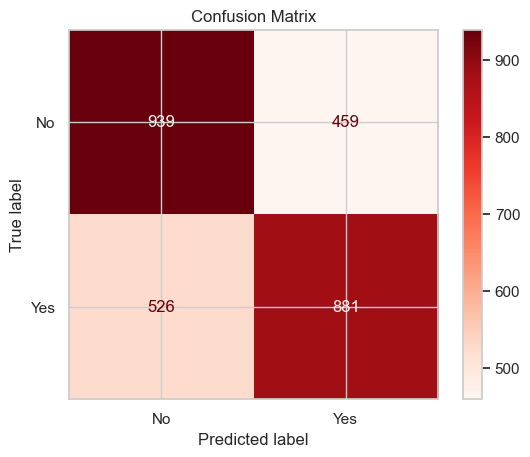

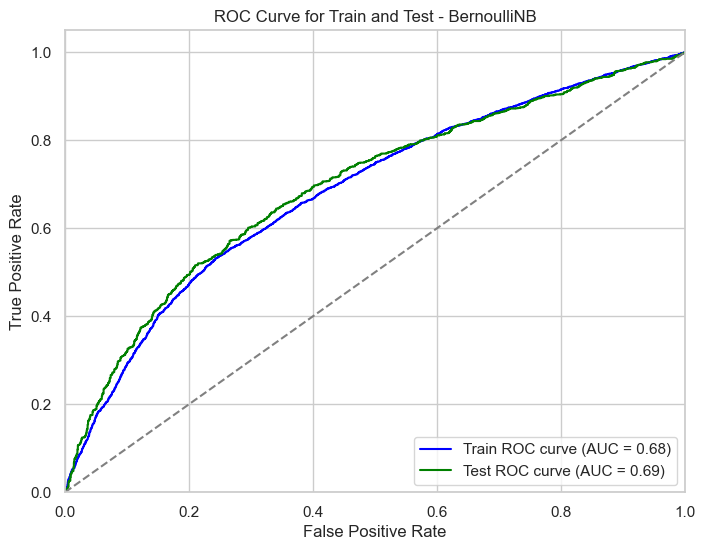


              precision    recall  f1-score   support

           0       0.64      0.67      0.66      1398
           1       0.66      0.63      0.64      1407

    accuracy                           0.65      2805
   macro avg       0.65      0.65      0.65      2805
weighted avg       0.65      0.65      0.65      2805



In [57]:
## naive bayes.

# model & mic
selector3 = SelectKBest(score_func = mutual_info_classif, k = 51)
X_train_selected = selector3.fit_transform(X_train, y_train)
X_test_selected = selector3.transform(X_test)

# Store best features into a dictionary
selected_features = X_train.columns[selector3.get_support()]
mic_feature_importance3 = {feature: selector3.scores_[i] for i, feature in enumerate(selected_features)}

# hyperparameter tune using GridSearchCV
param_grid = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
    'binarize': [0.2, 0.3, 0.5, 0.7],
    'fit_prior': [True, False]
}

# Kfold technique for tune
v = StratifiedKFold(n_splits = 30, shuffle = True, random_state = 42)

# GridSearchCV with naive bayes
grid_search = GridSearchCV(estimator = BernoulliNB(), param_grid = param_grid,\
                           scoring = 'accuracy', cv = v, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model3 = grid_search.best_estimator_

# prediction
pred_train = best_model3.predict(X_train[selected_features])
pred_test = best_model3.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores3 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Naive Bayes\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Reds')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model3, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### -----------------------------------------------------------------------------------------------------------------------------------------

## 2.Tree Based Models(Decision Tree, Random Forest, Gradient Boosting, AdaBoost)

Decision Tree

Best Hyperparameters: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Hyperparameters CV_Scores: 0.6822363574376372
Best Hyperparameters Estimator: DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
Train Accuracy: 0.6824137623674125
Test Accuracy: 0.669162210338681
Precision: 0.650534255185418
Recall: 0.7356076759061834
F1-Score: 0.6904603068712475
----------------------------------------------------------------------------------------------------


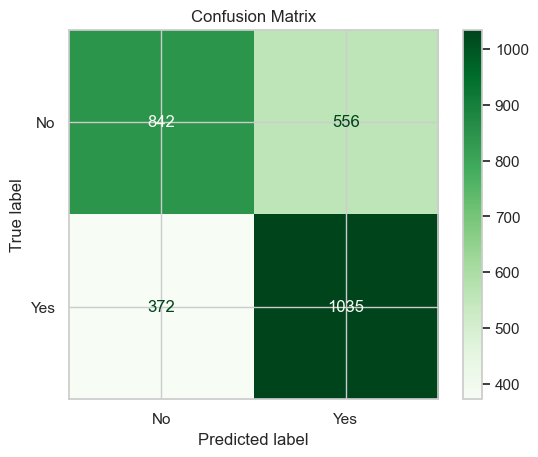

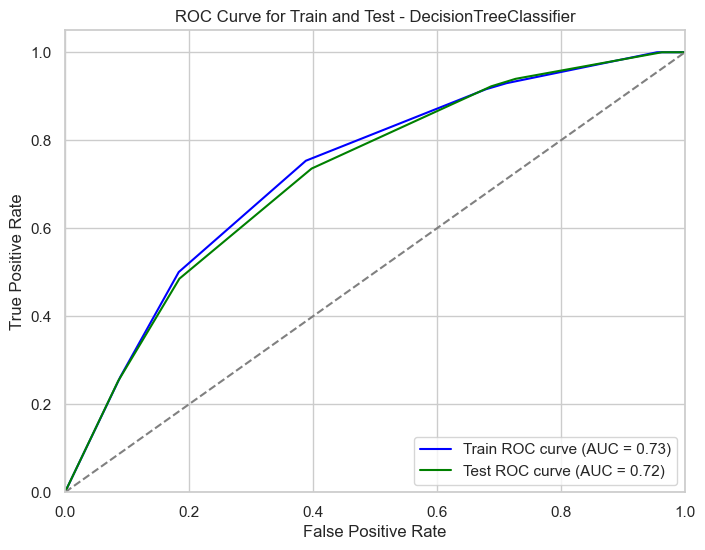


              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1398
           1       0.65      0.74      0.69      1407

    accuracy                           0.67      2805
   macro avg       0.67      0.67      0.67      2805
weighted avg       0.67      0.67      0.67      2805



In [58]:
## decision tree.

# model & RFE
dt_model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
selector4 = RFE(estimator = dt_model, n_features_to_select = 40, step = 1)

# model train
selector4.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector4.support_]
rfe_feature_importance4 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.01, 0.05, 0.1],
    'class_weight': ['balanced', None]
}

# Kfold technique for tune
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)  

# GridSearchCV with Decision Tree
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'), param_grid = param_grid,\
                           scoring = 'accuracy', cv = kf, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model4 = grid_search.best_estimator_

# prediction
pred_train = best_model4.predict(X_train[selected_features])
pred_test = best_model4.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores4 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Decision Tree\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print('Best Hyperparameters Estimator:', best_model4)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Greens')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model4, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

Random Forest

Best Hyperparameters: {'warm_start': True, 'random_state': 42, 'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Best Hyperparameters CV_Scores: 0.7364300241222107
Best Hyperparameters Estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=8, min_samples_split=12,
                       random_state=42, warm_start=True)
Train Accuracy: 0.7676263481593725
Test Accuracy: 0.7368983957219252
Precision: 0.7347368421052631
Recall: 0.744136460554371
F1-Score: 0.739406779661017
----------------------------------------------------------------------------------------------------


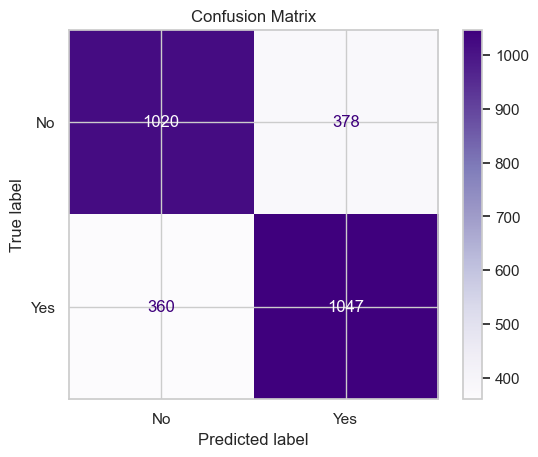

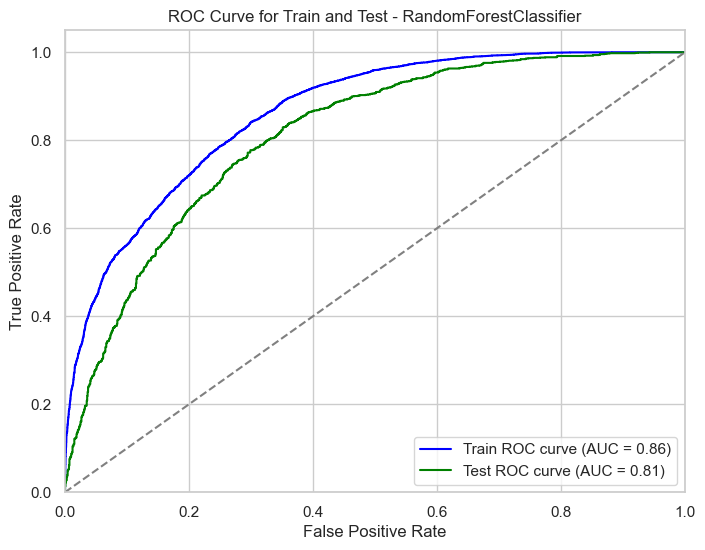


              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1398
           1       0.73      0.74      0.74      1407

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



In [59]:
## random forest.

# model & RFE
rf_model = RandomForestClassifier(random_state = 42)
selector5 = RFE(estimator = rf_model, n_features_to_select = 30, step = 10)

# model train
selector5.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector5.support_]
rfe_feature_importance5 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10],
    'min_samples_split': [12, 15, 20],
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced', 'balanced_subsample'],
    'warm_start': [True],
    'random_state': [42]
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)  

# GridSearchCV with Random Forest
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)

random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model5 = random_search.best_estimator_

# prediction
pred_train = best_model5.predict(X_train[selected_features])
pred_test = best_model5.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores5 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Random Forest\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model5)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Purples')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model5, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

Gradient Boosting

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Best Hyperparameters CV_Scores: 0.753631877480212
Best Hyperparameters Estimator: GradientBoostingClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=6,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)
Train Accuracy: 0.7797486406988146
Test Accuracy: 0.7379679144385026
Precision: 0.7307692307692307
Recall: 0.7562189054726368
F1-Score: 0.7432762836185819
----------------------------------------------------------------------------------------------------


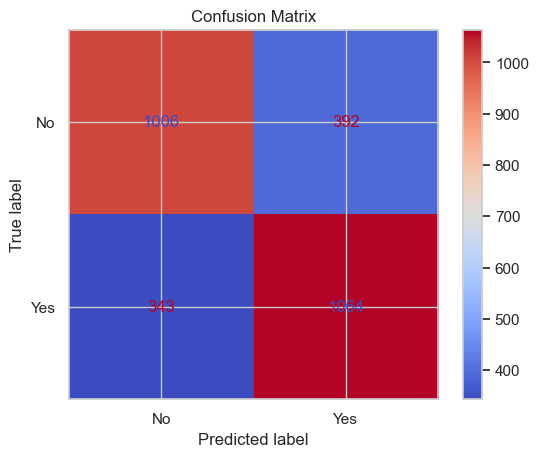

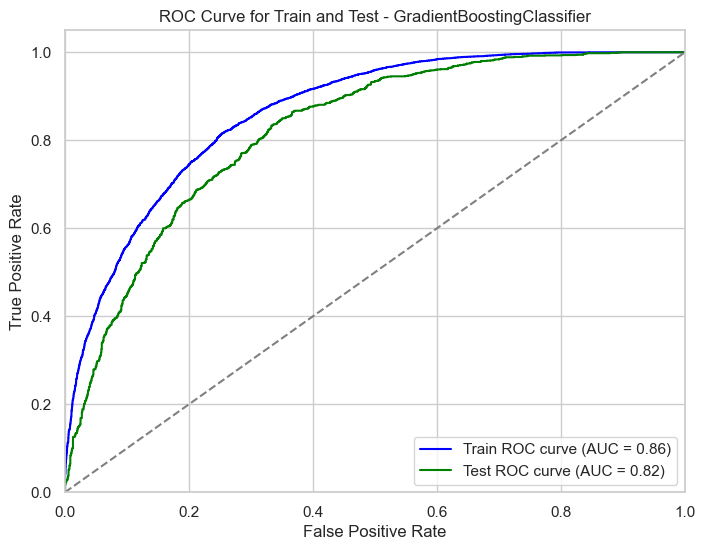


              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1398
           1       0.73      0.76      0.74      1407

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



In [61]:
## gradient boosting.

# model & RFE
gb_model = GradientBoostingClassifier(random_state = 42)
selector6 = RFE(estimator = gb_model, n_features_to_select = 45, step = 10)

# model train
selector6.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector6.support_]
rfe_feature_importance6 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 6, 7],
    'subsample': [0.7, 0.8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['friedman_mse']
}

# Kfold technique for tune
kf = KFold(n_splits = 15, shuffle = True, random_state = 42)  

# RandomizedSearchCV with Gradient Boosting
random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)

random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model6 = random_search.best_estimator_

# prediction
pred_train = best_model6.predict(X_train[selected_features])
pred_test = best_model6.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores6 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Gradient Boosting\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model6)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model6, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

Adaptive Boost

Best Hyperparameters: {'random_state': 42, 'n_estimators': 300, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Best Hyperparameters CV_Scores: 0.700864471974825
Best Hyperparameters Estimator: AdaBoostClassifier(learning_rate=0.2, n_estimators=300, random_state=42)
Train Accuracy: 0.7037169088154025
Test Accuracy: 0.7019607843137254
Precision: 0.7082421590080233
Recall: 0.6901208244491827
F1-Score: 0.6990640748740101
----------------------------------------------------------------------------------------------------


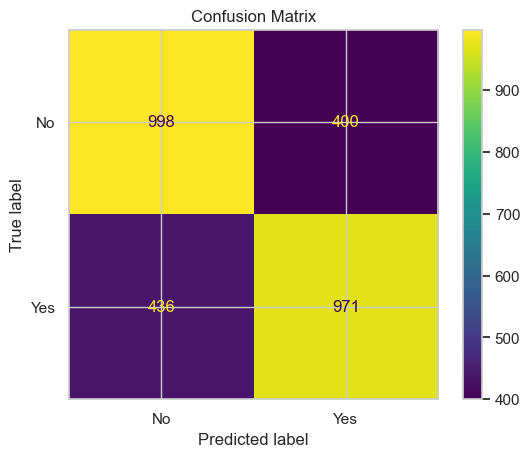

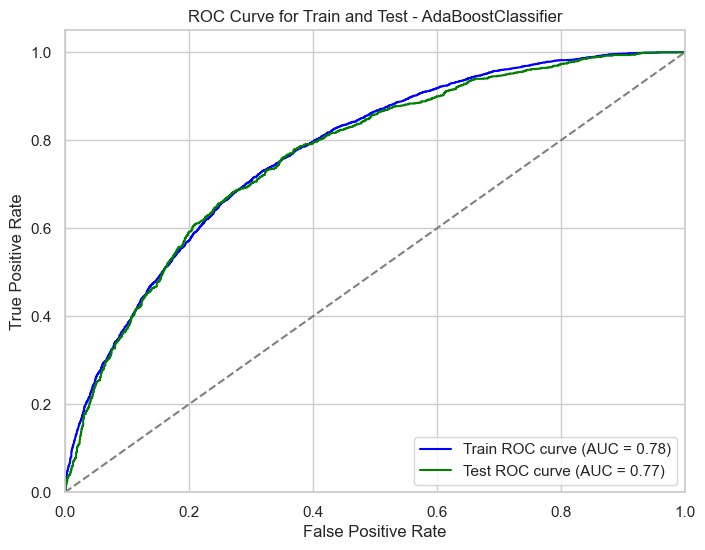


              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1398
           1       0.71      0.69      0.70      1407

    accuracy                           0.70      2805
   macro avg       0.70      0.70      0.70      2805
weighted avg       0.70      0.70      0.70      2805



In [62]:
## adaboost.

# model & RFE
ab_model = AdaBoostClassifier(random_state = 42)
selector7 = RFE(estimator = ab_model, n_features_to_select = 45, step = 10)

# model train
selector7.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector7.support_]
rfe_feature_importance7 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42],
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)  

# RandomizedSearchCV with Adaptive Boost
random_search = RandomizedSearchCV(estimator = AdaBoostClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)

random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model7 = random_search.best_estimator_

# prediction
pred_train = best_model7.predict(X_train[selected_features])
pred_test = best_model7.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores7 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Adaptive Boost\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model7)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'viridis')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model7, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### -----------------------------------------------------------------------------------------------------------------------------------------

## 3. Advanced Models(SVC, XGBoost)

Support Vector Machine

Best Hyperparameters: {'random_state': 42, 'kernel': 'poly', 'gamma': 'auto', 'C': 10}
Best Hyperparameters CV_Scores: 0.7202069230903779
Best Hyperparameters Estimator: SVC(C=10, gamma='auto', kernel='poly', random_state=42)
Train Accuracy: 0.7772528745877529
Test Accuracy: 0.7033868092691622
Precision: 0.7156789197299325
Recall: 0.6780383795309168
F1-Score: 0.6963503649635037
----------------------------------------------------------------------------------------------------


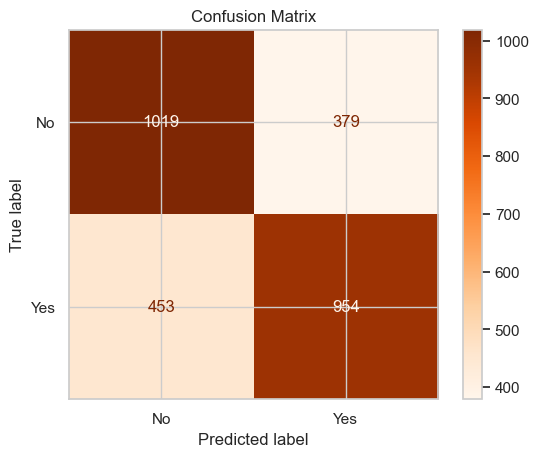


              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1398
           1       0.72      0.68      0.70      1407

    accuracy                           0.70      2805
   macro avg       0.70      0.70      0.70      2805
weighted avg       0.70      0.70      0.70      2805



In [63]:
## Support Vector Machine.

# model & RFE
svc_model = SVC(kernel = 'linear', random_state = 42)
selector8 = RFE(estimator = svc_model, n_features_to_select = 45, step = 10)

# model train
selector8.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector8.support_]
rfe_feature_importance8 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'random_state': [42]
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)  

# RandomizedSearchCV with SVC
random_search = RandomizedSearchCV(estimator = SVC(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 10, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)

random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model8 = random_search.best_estimator_

# prediction
pred_train = best_model8.predict(X_train[selected_features])
pred_test = best_model8.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores8 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Support Vector Machine\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model8)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Oranges')
plt.title('Confusion Matrix')
plt.show()

# classification report.

print()
print(classification_report(y_test, pred_test))

### ******************************************************************************************************************************

XGBoost

Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 20, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'eval_metric': 'auc', 'colsample_bytree': 0.7, 'booster': 'gbtree'}
Best Hyperparameters CV_Scores: 0.7503345625006956
Best Hyperparameters Estimator: XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_es

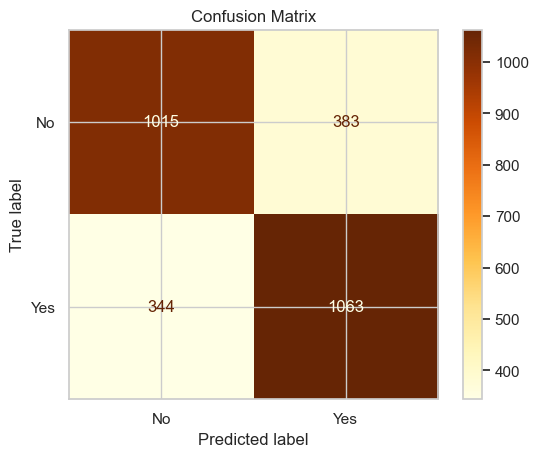

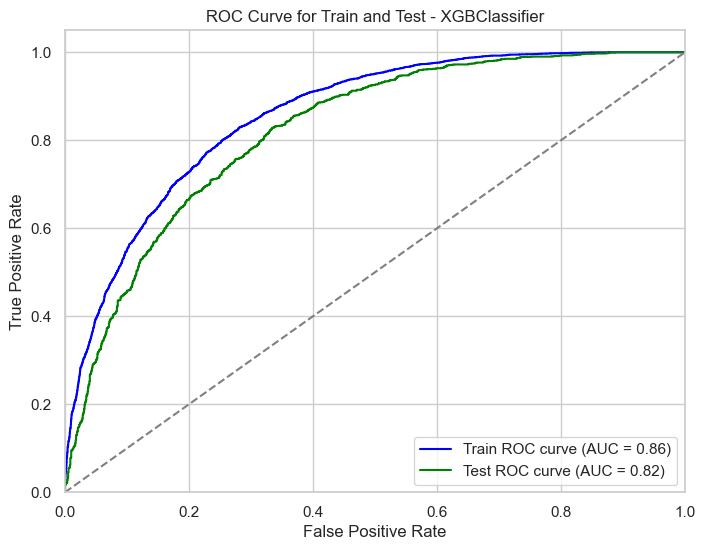


              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1398
           1       0.74      0.76      0.75      1407

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



In [64]:
## xgboost.

# model & RFE
xgb_model = XGBClassifier(random_state = 42)
selector9 = RFE(estimator = xgb_model, n_features_to_select = 45, step = 10)

# model train
selector9.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector9.support_]
rfe_feature_importance9 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.7, 0.75],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [1.5, 2],
    'min_child_weight': [20, 30],
    'eval_metric': ['logloss', 'auc'],
    'booster': ['gbtree'],
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)  

# RandomizedSearchCV with XGBoost
random_search = RandomizedSearchCV(estimator = XGBClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 40, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)

random_search.fit(X_train[selected_features], y_train)

# Best Estimator from RandomizedSearchCV
best_model9 = random_search.best_estimator_

# prediction
pred_train = best_model9.predict(X_train[selected_features])
pred_test = best_model9.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores9 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('XGBoost\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model9)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'YlOrBr')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot

plot_roc_auc_with_accuracy(best_model9, X_train, y_train, X_test, y_test, selected_features)

# classification report.

print()
print(classification_report(y_test, pred_test))

### -----------------------------------------------------------------------------------------------------------------------------------------

## Feature Importance From Each Model

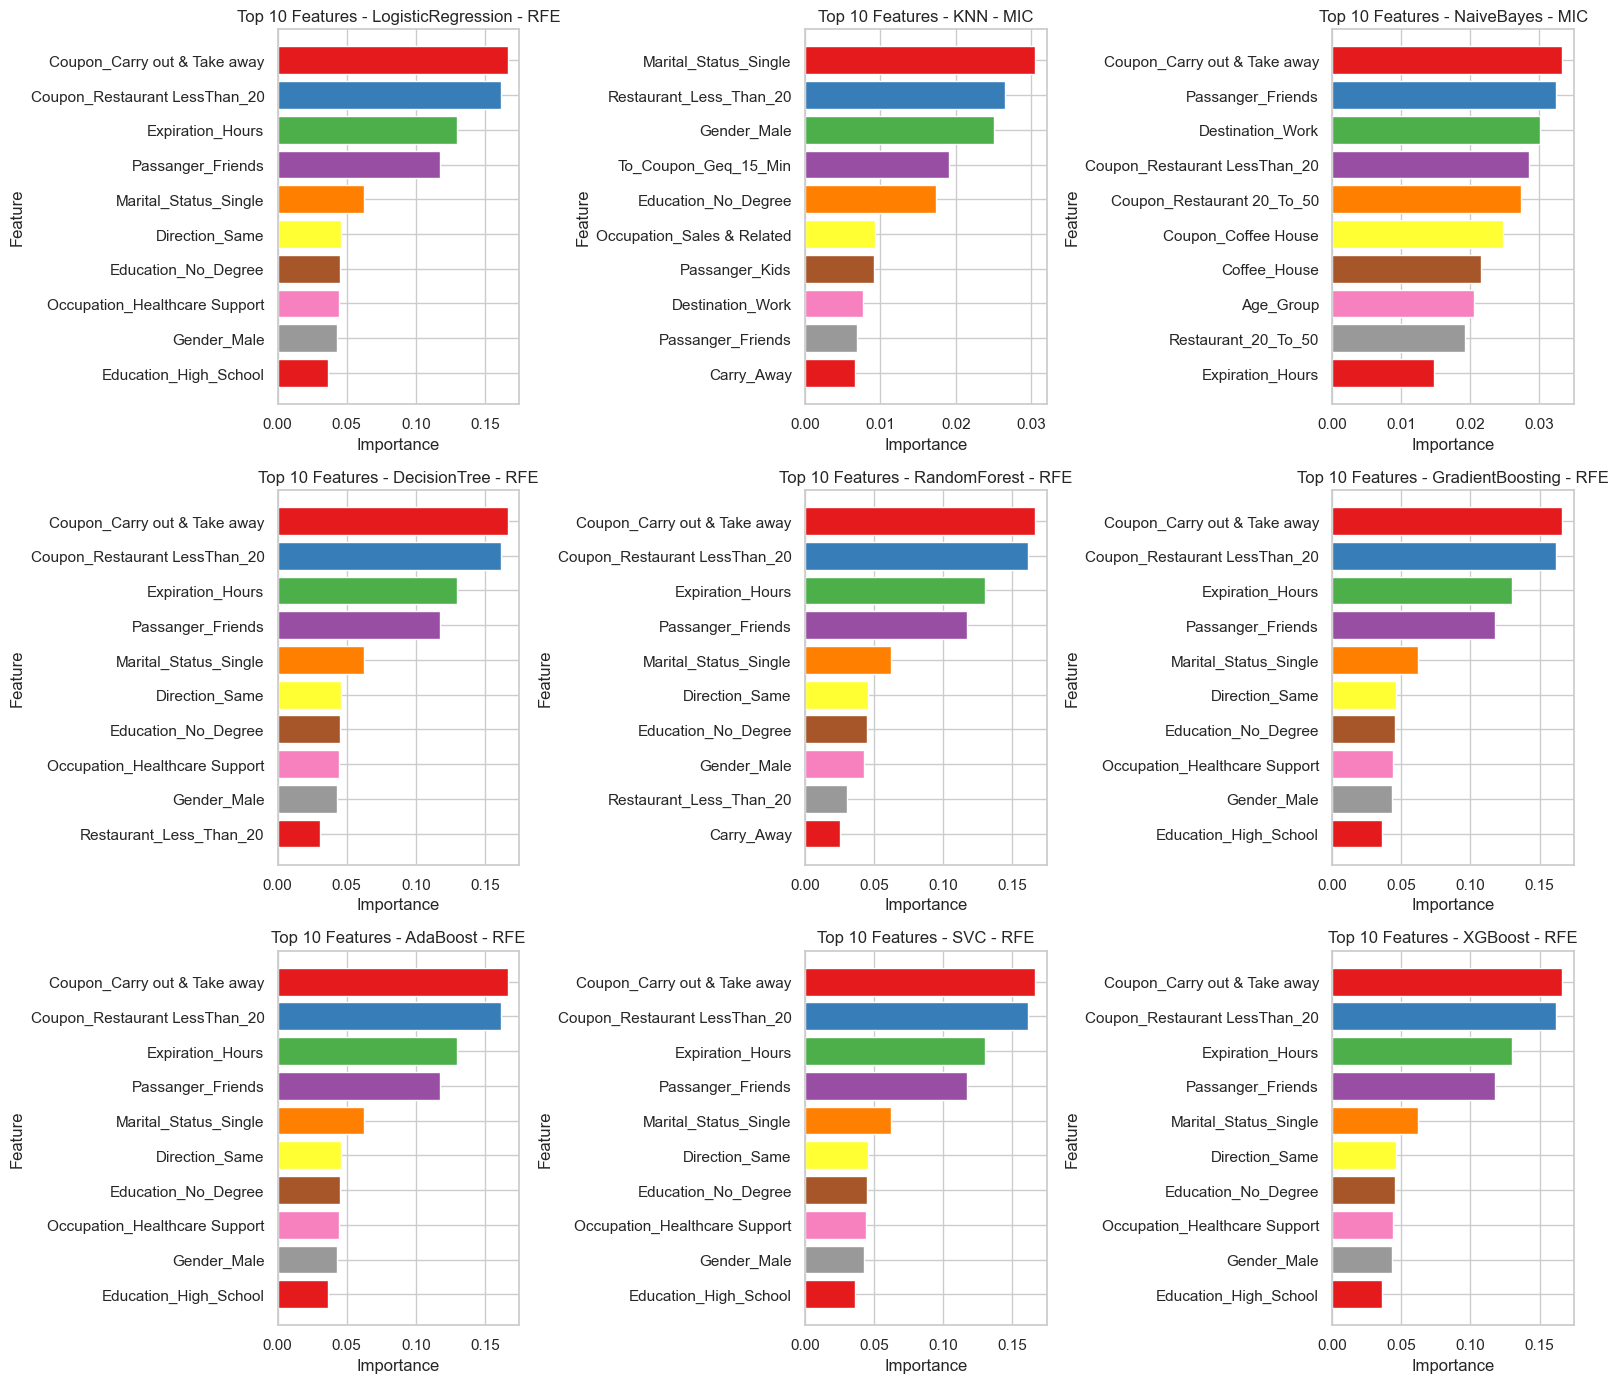

In [70]:
## plot.

important_features = [rfe_feature_importance1, mic_feature_importance2, mic_feature_importance3, rfe_feature_importance4,\
        rfe_feature_importance5, rfe_feature_importance6, rfe_feature_importance7, rfe_feature_importance8, rfe_feature_importance9]

models_names = ['LogisticRegression - RFE', 'KNN - MIC', 'NaiveBayes - MIC', 'DecisionTree - RFE', 'RandomForest - RFE',\
         'GradientBoosting - RFE', 'AdaBoost - RFE', 'SVC - RFE', 'XGBoost - RFE']

fig, axes = plt.subplots(3, 3, figsize = (16, 14))
axes = axes.ravel() 
palette = sns.color_palette('Set1', 10)

for idx, features_imp in enumerate(important_features):
    sorted_features = sorted(features_imp.items(), key = lambda x: x[1], reverse = True)
    top_10_features = sorted_features[:10]

    features, importances = zip(*top_10_features)

    axes[idx].barh(features, importances, color = palette)
    axes[idx].set_xlabel('Importance')
    axes[idx].set_ylabel('Feature')
    axes[idx].set_title(f'Top 10 Features - {models_names[idx]}')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

## Train/Test Accuracy Plot

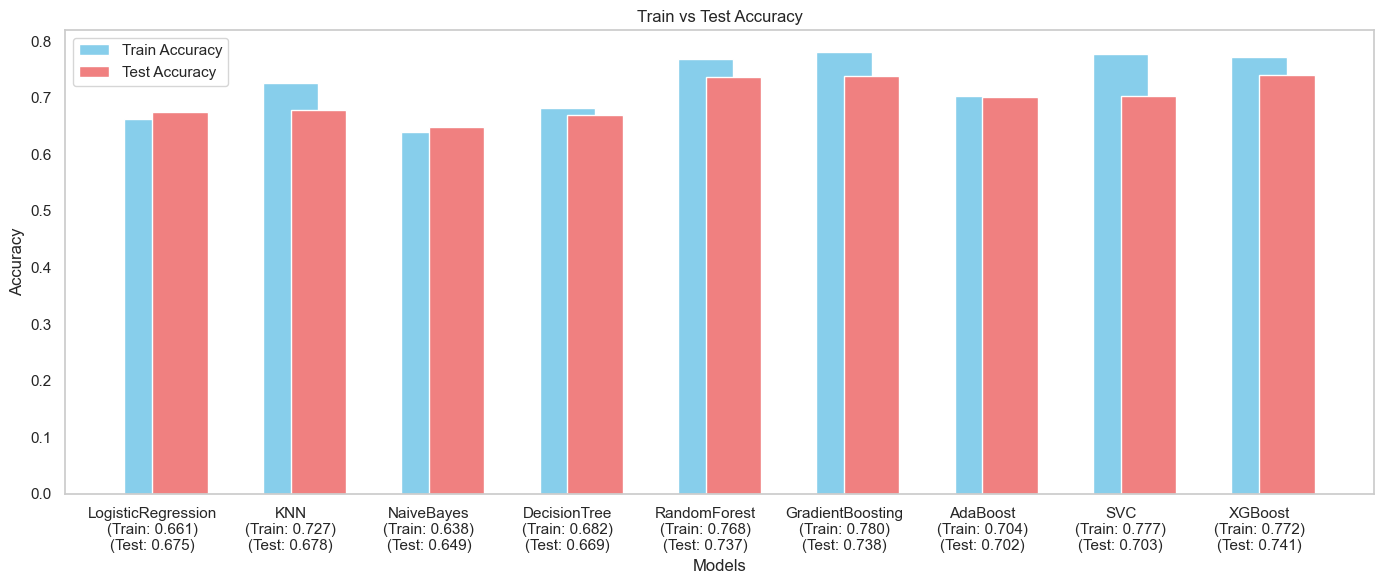

In [74]:
## barplot.

acuuracy_scores_list = [accuracy_scores1, accuracy_scores2, accuracy_scores3, accuracy_scores4, accuracy_scores5, accuracy_scores6,\
         accuracy_scores7, accuracy_scores8, accuracy_scores9]
model_names_list = ['LogisticRegression', 'KNN', 'NaiveBayes', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'SVC', 'XGBoost']

train_accuracies = [model['Train Accuracy'] for model in acuuracy_scores_list]
test_accuracies = [model['Test Accuracy'] for model in acuuracy_scores_list]

plt.figure(figsize = (14, 6))

plt.bar(range(len(acuuracy_scores_list)), train_accuracies, width = 0.4, label = 'Train Accuracy', align = 'center', color = 'skyblue')
plt.bar(range(len(acuuracy_scores_list)), test_accuracies, width = 0.4, label = 'Test Accuracy', align = 'edge', color = 'lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
xticks_labels = [f'{model_name}\n(Train: {train:.3f})\n(Test: {test:.3f})' for model_name, train, test in zip(model_names_list, train_accuracies, test_accuracies)]
plt.xticks(range(len(model_names_list)), xticks_labels)
plt.legend()
plt.grid(visible = False)
plt.tight_layout()
plt.show()

## Load the models to (Deployment)

In [76]:
## pickle.

models = [best_model1, best_model2, best_model3, best_model4, best_model5, best_model6, best_model7, best_model8, best_model9]
model_names = ['LogisticRegression', 'KNN', 'NaiveBayes', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'SVC', 'XGBoost']

# Loop through each model and save them as .pkl files
for model, name in zip(models, model_names):
    with open(f'{name}_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"{name} model saved successfully.")

LogisticRegression model saved successfully.
KNN model saved successfully.
NaiveBayes model saved successfully.
DecisionTree model saved successfully.
RandomForest model saved successfully.
GradientBoosting model saved successfully.
AdaBoost model saved successfully.
SVC model saved successfully.
XGBoost model saved successfully.


#### Note: Best model is XGBoost with accuracy of [74.1%], Runnerup is GradientBoost with accuracy of [73.8%], 3rd most model is RandomForest with accuracy of [73.7%] & Baseline models gives accuracy of [Lr - 67.5%, Knn - 67.8%, NB - 65.0%].

# ------------------------------------------ The End ------------------------------------------